In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Load in data
data = pd.read_csv('data/train.csv')

In [3]:
pd.set_option('display.max_columns', 500)
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [5]:
#reindex with PetID
data.index = data['PetID']
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18 

Let's check for duplicated observations. 

In [7]:
data.duplicated().sum()

0

In [8]:
data['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

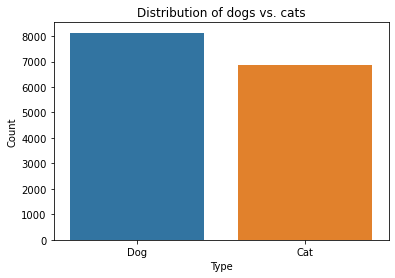

In [9]:
typeData = data.groupby(['Type']).count().reset_index()
typeData
ax = sns.barplot(x = 'Type', y = 'PetID', data=typeData)
plt.xticks(np.arange(0,2), ["Dog", "Cat"])
plt.ylabel('Count')
plt.title('Distribution of dogs vs. cats')
plt.show()

Let's split the data into two datasets: Dog and cat.

In [10]:
dogData = data[data.Type == 1].drop(columns = 'Type')
catData = data[data.Type == 2].drop(columns = 'Type')

In [11]:
dogData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8132 entries, 3422e4906 to a83d95ead
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           7483 non-null   object 
 1   Age            8132 non-null   int64  
 2   Breed1         8132 non-null   int64  
 3   Breed2         8132 non-null   int64  
 4   Gender         8132 non-null   int64  
 5   Color1         8132 non-null   int64  
 6   Color2         8132 non-null   int64  
 7   Color3         8132 non-null   int64  
 8   MaturitySize   8132 non-null   int64  
 9   FurLength      8132 non-null   int64  
 10  Vaccinated     8132 non-null   int64  
 11  Dewormed       8132 non-null   int64  
 12  Sterilized     8132 non-null   int64  
 13  Health         8132 non-null   int64  
 14  Quantity       8132 non-null   int64  
 15  Fee            8132 non-null   int64  
 16  State          8132 non-null   int64  
 17  RescuerID      8132 non-null   object 
 18  

In [12]:
catData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6861 entries, 86e1089a3 to e4da1c9e4
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           6253 non-null   object 
 1   Age            6861 non-null   int64  
 2   Breed1         6861 non-null   int64  
 3   Breed2         6861 non-null   int64  
 4   Gender         6861 non-null   int64  
 5   Color1         6861 non-null   int64  
 6   Color2         6861 non-null   int64  
 7   Color3         6861 non-null   int64  
 8   MaturitySize   6861 non-null   int64  
 9   FurLength      6861 non-null   int64  
 10  Vaccinated     6861 non-null   int64  
 11  Dewormed       6861 non-null   int64  
 12  Sterilized     6861 non-null   int64  
 13  Health         6861 non-null   int64  
 14  Quantity       6861 non-null   int64  
 15  Fee            6861 non-null   int64  
 16  State          6861 non-null   int64  
 17  RescuerID      6861 non-null   object 
 18  

### Dog data analysis

In [13]:
dogData.head()

,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
5842f1ff5,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
850a43f90,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
97aa9eeac,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8b693ca84,Bear,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1


In [14]:
dogData['HasName'] = np.where(dogData.Name.isna(), 0, 1)

In [15]:
dogData.HasName.value_counts()

1    7483
0     649
Name: HasName, dtype: int64

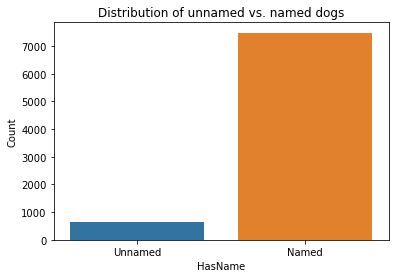

In [16]:
ax = sns.barplot(x = 'HasName', y = 'PetID', data=dogData.groupby(['HasName']).count().reset_index())
plt.xticks(np.arange(0,2), ["Unnamed", "Named"])
plt.ylabel('Count')
plt.title('Distribution of unnamed vs. named dogs')
plt.show()

In [17]:
enc = preprocessing.OneHotEncoder()
hasNameEnc = enc.fit_transform(dogData.HasName.values.reshape(-1, 1)).toarray()
hasNameOneHot = pd.DataFrame(hasNameEnc, columns = ["HasName_"+str(i) for i in sorted(dogData.HasName.unique()) ])
dogData = pd.concat([dogData, hasNameOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'HasName' column
dogData.drop(['HasName'], axis=1, inplace = True) 
dogData.head()

,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0
5842f1ff5,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0
850a43f90,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0
97aa9eeac,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0
8b693ca84,Bear,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0


In [18]:
dogData['NameLen'] = dogData['Name'].str.len()

In [19]:
# Set observations with 'NameLen' na to 0
dogData['NameLen'] = np.where(dogData['NameLen'].isna(), 0, dogData['NameLen']) 

In [20]:
dogData.NameLen.describe()

count    8132.000000
mean        8.356247
std         7.210343
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        45.000000
Name: NameLen, dtype: float64

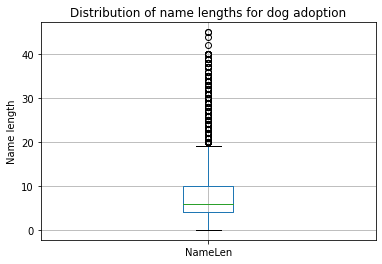

In [21]:
dogData[['NameLen']].boxplot()
plt.ylabel('Name length')
plt.title('Distribution of name lengths for dog adoption')
plt.show()

In [22]:
dogData['NameNumWords'] = dogData.Name.str.split().str.len()
dogData.head()

,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0
5842f1ff5,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0
850a43f90,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0
97aa9eeac,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0
8b693ca84,Bear,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0


In [23]:
# Set observations with 'NameNumWords' na to 0
dogData['NameNumWords'] = np.where(dogData['NameNumWords'].isna(), 0, dogData['NameNumWords']) 

In [24]:
dogData.NameNumWords.describe()

count    8132.000000
mean        1.596409
std         1.294692
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: NameNumWords, dtype: float64

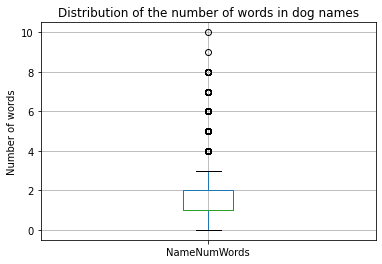

In [25]:
dogData[['NameNumWords']].boxplot()
plt.ylabel('Number of words')
plt.title('Distribution of the number of words in dog names')
plt.show()

In [26]:
# Drop Name feature
dogData.drop(columns = 'Name', inplace = True)

In [27]:
dogData.Age.describe()

count    8132.000000
mean       12.906173
std        21.377588
min         0.000000
25%         2.000000
50%         3.000000
75%        12.000000
max       255.000000
Name: Age, dtype: float64

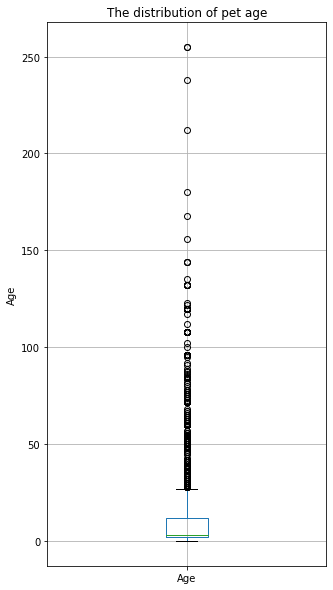

In [28]:
plt.figure(figsize = (5, 10))
dogData[['Age']].boxplot()
plt.ylabel('Age')
plt.title('The distribution of pet age')
plt.show()

75% of pets are between ages 0-12 months.  The distribution is highly right skewed. Let's remove outliers 3 stds below & above the mean.

In [29]:
z_scores = stats.zscore(dogData.Age)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dogData = dogData[filtered_entries]

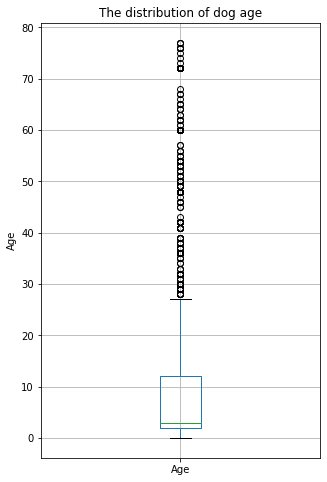

In [30]:
plt.figure(figsize = (5, 8))
dogData[['Age']].boxplot()
plt.ylabel('Age')
plt.title('The distribution of dog age')
plt.show()

In [31]:
dogData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7922 entries, 3422e4906 to a83d95ead
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7922 non-null   int64  
 1   Breed1         7922 non-null   int64  
 2   Breed2         7922 non-null   int64  
 3   Gender         7922 non-null   int64  
 4   Color1         7922 non-null   int64  
 5   Color2         7922 non-null   int64  
 6   Color3         7922 non-null   int64  
 7   MaturitySize   7922 non-null   int64  
 8   FurLength      7922 non-null   int64  
 9   Vaccinated     7922 non-null   int64  
 10  Dewormed       7922 non-null   int64  
 11  Sterilized     7922 non-null   int64  
 12  Health         7922 non-null   int64  
 13  Quantity       7922 non-null   int64  
 14  Fee            7922 non-null   int64  
 15  State          7922 non-null   int64  
 16  RescuerID      7922 non-null   object 
 17  VideoAmt       7922 non-null   int64  
 18  

210 records were removed.

Create a new feature 'ThreeMonths' which determines whether a dog is above or below 3 months of age.

In [32]:
dogData['ThreeMonths'] = np.where(dogData['Age'] <= 3, 1, 0) 
dogData.ThreeMonths.value_counts()

1    4296
0    3626
Name: ThreeMonths, dtype: int64

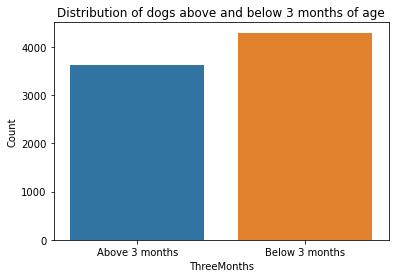

In [33]:
ax = sns.barplot(x = 'ThreeMonths', y = 'PetID', data=dogData.groupby(['ThreeMonths']).count().reset_index())
plt.xticks(np.arange(0,2), ["Above 3 months", "Below 3 months"])
plt.ylabel('Count')
plt.title('Distribution of dogs above and below 3 months of age')
plt.show()

In [34]:
enc = preprocessing.OneHotEncoder()
threeMonthsEnc = enc.fit_transform(dogData.ThreeMonths.values.reshape(-1, 1)).toarray()
threeMonthsOneHot = pd.DataFrame(threeMonthsEnc, columns = ["ThreeMonths_"+str(i) for i in sorted(dogData.ThreeMonths.unique()) ])
dogData = pd.concat([dogData, threeMonthsOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'ThreeMonths' column
dogData.drop(['ThreeMonths'], axis=1, inplace = True) 
dogData.head()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0
5842f1ff5,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0
850a43f90,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0
97aa9eeac,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0
8b693ca84,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0


In [35]:
dogData['Breed1'].value_counts() #We notice a large proportion of breed 307 (mixed breed)

307    5881
141     191
205     161
179     157
218     157
       ... 
85        1
81        1
143       1
123       1
25        1
Name: Breed1, Length: 112, dtype: int64

In [36]:
dogData[dogData['Breed1'] == 0] 

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
375905770,2,0,26,2,2,0,0,2,1,1,1,2,1,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3.0,3,0.0,1.0,8.0,2.0,0.0,1.0
da8d4a273,4,0,307,2,2,3,0,2,1,1,1,2,1,1,100,41326,3673e167fc9932b13149bed1f2a0180a,0,"She's only 4 months old, very friendly and lov...",da8d4a273,5.0,4,0.0,1.0,21.0,4.0,1.0,0.0
7b5bee232,72,0,307,1,1,2,0,2,2,2,2,2,1,1,0,41326,94b991f8dc1e0bb903ca8d4d492c8d43,0,He is a stray dog found wandering around Unive...,7b5bee232,5.0,4,0.0,1.0,9.0,2.0,1.0,0.0
0327b8e94,2,0,205,2,2,5,7,1,1,2,2,2,1,1,1,41336,5232bdd1444960a257ccec9a41404320,0,I want to adopt a newborn puppy Prefer small b...,0327b8e94,0.0,3,0.0,1.0,34.0,5.0,0.0,1.0


In [37]:
#There appears to be some breeds mistakenly filled into Breed2 instead of Breed1, let's fix this.
dogData.Breed1 = np.where((dogData['Breed1']==0) & (dogData['Breed2']!=0), dogData['Breed2'], dogData['Breed1']) #If breed1 = 0 but not breed2, set breed1 to breed2 and breed2 to 0
dogData.Breed2 = np.where((dogData['Breed1']== dogData['Breed2']), 0, dogData['Breed2'])  #If breed1 = breed2, set breed2 to 0

In [38]:
dogData[(dogData.Breed1 == 307) & (dogData.Breed2 != 0)]

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1bf24d8be,10,307,117,2,1,2,7,2,2,1,1,1,1,1,0,41326,aa66486163b6cbc25ea62a34b11c9b91,0,Donut is a friendly doggie and very domesticat...,1bf24d8be,0.0,4,0.0,1.0,5.0,1.0,1.0,0.0
6fecc5cf7,1,307,141,2,1,0,0,2,2,2,1,1,1,2,0,41326,8b6c5cd067ada5f54ca5ffc7f7b5d896,0,2 adorable female black pups rescued from USJ ...,6fecc5cf7,13.0,3,0.0,1.0,11.0,2.0,0.0,1.0
815f4cc08,3,307,141,1,5,0,0,2,2,3,3,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Lovely puppy with good nature looking for a ho...,815f4cc08,3.0,3,0.0,1.0,4.0,1.0,0.0,1.0
8df0bb3b3,2,307,76,1,1,7,0,2,1,1,1,2,1,1,0,41326,e03a1162538a0414d6c79823ad6c2744,4,"Mochi, momo and Molly are siblings, about 3 mo...",8df0bb3b3,18.0,3,0.0,1.0,5.0,1.0,0.0,1.0
6d9b202c9,4,307,36,2,1,2,7,2,2,1,1,1,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,She was found wandering around a playground of...,6d9b202c9,10.0,3,0.0,1.0,5.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1f58a286e,1,307,189,2,1,3,0,2,2,3,3,3,1,1,0,41326,f894b0c7b058834d0a9749b665479732,0,Found it beside road under a big tree alone an...,1f58a286e,1.0,1,0.0,1.0,7.0,1.0,0.0,1.0
94e45a1a7,2,307,109,2,2,0,0,2,2,1,1,2,1,2,0,41327,97af7642dd8e837dedbefe1f013ca31e,0,"cute,fat,active^^ One male and one female",94e45a1a7,0.0,0,0.0,1.0,6.0,1.0,0.0,1.0
5bbf44cea,24,307,152,2,1,2,0,2,1,1,1,1,1,1,0,41327,86552e2f34c929a01f7841cbd8865b20,0,Previously always stay together with a male do...,5bbf44cea,2.0,4,0.0,1.0,5.0,1.0,1.0,0.0


In [39]:
#If Breed1 == 307 and Breed2 != 0, swap the values so that Breed1 contains a known breed
tempBreed1 = np.where((dogData['Breed1'] == 307) & (dogData['Breed2'] != 0), dogData['Breed2'], dogData['Breed1'])
dogData.Breed2 = np.where((dogData['Breed1'] == 307) & (dogData['Breed2'] != 0), 307, dogData['Breed2'])
dogData.Breed1 = tempBreed1

In [40]:
# Check that there are no cat breeds accidentally inputted into the dog adoption dataset 
incorrectBreeds = dogData[((dogData['Breed1'] > 240) & (dogData['Breed1'] != 307)) | ((dogData['Breed2'] > 240) & (dogData['Breed2'] != 307))]
incorrectBreeds

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [41]:
#Create new predictor variable: pureBreed
dogData['PureBreed'] = np.where((dogData.Breed2 == 0) & (dogData.Breed1 != 307), 1, 0)

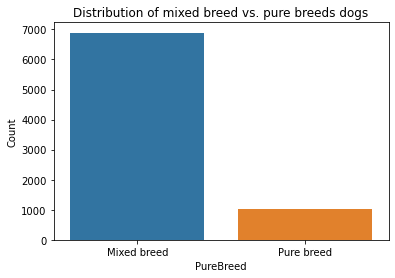

In [42]:
ax = sns.barplot(x = 'PureBreed', y = 'PetID', data=dogData.groupby(['PureBreed']).count().reset_index())
plt.xticks(np.arange(0,2), ["Mixed breed", "Pure breed"])
plt.ylabel('Count')
plt.title('Distribution of mixed breed vs. pure breeds dogs')
plt.show()

In [43]:
enc = preprocessing.OneHotEncoder()
pureBreedEnc = enc.fit_transform(dogData.PureBreed.values.reshape(-1, 1)).toarray()
pureBreedOneHot = pd.DataFrame(pureBreedEnc, columns = ["PureBreed_"+str(i) for i in sorted(dogData.PureBreed.unique()) ])
dogData = pd.concat([dogData, pureBreedOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'PureBreed' column
dogData.drop(['PureBreed'], axis=1, inplace = True) 
dogData.head()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0
5842f1ff5,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0
850a43f90,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0
97aa9eeac,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0
8b693ca84,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0


In [44]:
breedCounts = dogData.Breed1.value_counts(normalize = True).to_frame()

In [45]:
breedCounts.head(15)

,Breed1
307,0.694143
141,0.031431
218,0.026635
205,0.020449
179,0.020197
109,0.019566
103,0.016536
213,0.014264
189,0.013759
20,0.010982


Let's only keep the top 10 most prominent breeds and group the rest of the breeds as others: 999.

In [46]:
top10Breeds = list(breedCounts.index[:10])
dogData.Breed1 = np.where((dogData['Breed1'].isin(top10Breeds)), dogData['Breed1'], 999) 

In [47]:
dogData.Breed1.value_counts()

307    5499
999    1046
141     249
218     211
205     162
179     160
109     155
103     131
213     113
189     109
20       87
Name: Breed1, dtype: int64

In [48]:
enc = preprocessing.OneHotEncoder()
breedEnc = enc.fit_transform(dogData.Breed1.values.reshape(-1, 1)).toarray()
breedOneHot = pd.DataFrame(breedEnc, columns = ["Breed_"+str(i) for i in sorted(dogData.Breed1.unique()) ])
dogData = pd.concat([dogData, breedOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Breed1' & 'Breed2' columns 
dogData.drop(['Breed1', 'Breed2'], axis=1, inplace = True) 
dogData.head()

,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5842f1ff5,4,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
850a43f90,1,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97aa9eeac,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8b693ca84,2,1,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
dogData.Gender.value_counts()

2    4157
1    2894
3     871
Name: Gender, dtype: int64

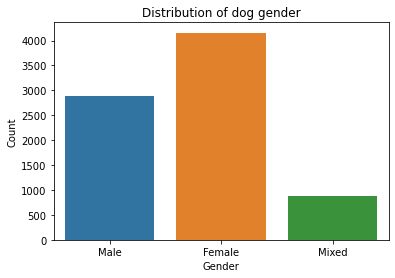

In [50]:
ax = sns.barplot(x = 'Gender', y = 'PetID', data=dogData.groupby(['Gender']).count().reset_index())
plt.xticks(np.arange(0,3), ["Male", "Female", "Mixed"])
plt.ylabel('Count')
plt.title('Distribution of dog gender')
plt.show()

In [51]:
enc = preprocessing.OneHotEncoder()
genderEnc = enc.fit_transform(dogData.Gender.values.reshape(-1, 1)).toarray()
genderOneHot = pd.DataFrame(genderEnc, columns = ["Gender_"+str(i) for i in sorted(dogData.Gender.unique()) ])
dogData = pd.concat([dogData, genderOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Gender' column
dogData.drop(['Gender'], axis=1, inplace = True) 
dogData.head()

,Age,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5842f1ff5,4,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
850a43f90,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
97aa9eeac,0,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8b693ca84,2,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
dogData.Color1.value_counts(dropna = False)

1    3878
2    2589
5     563
7     347
3     318
4     142
6      85
Name: Color1, dtype: int64

In [53]:
dogData.Color2.value_counts()

0    2898
2    2309
7    1506
5     611
3     279
4     207
6     112
Name: Color2, dtype: int64

In [54]:
dogData.Color3.value_counts()

0    6247
7    1204
5     257
3      88
4      75
6      51
Name: Color3, dtype: int64

In [55]:
#Reshape color data to be in the format for generating a histogram
colorData = pd.melt(dogData, id_vars = 'PetID', value_vars = ['Color1', 'Color2', 'Color3'], var_name = 'ColorNumber', value_name = 'ColorID')

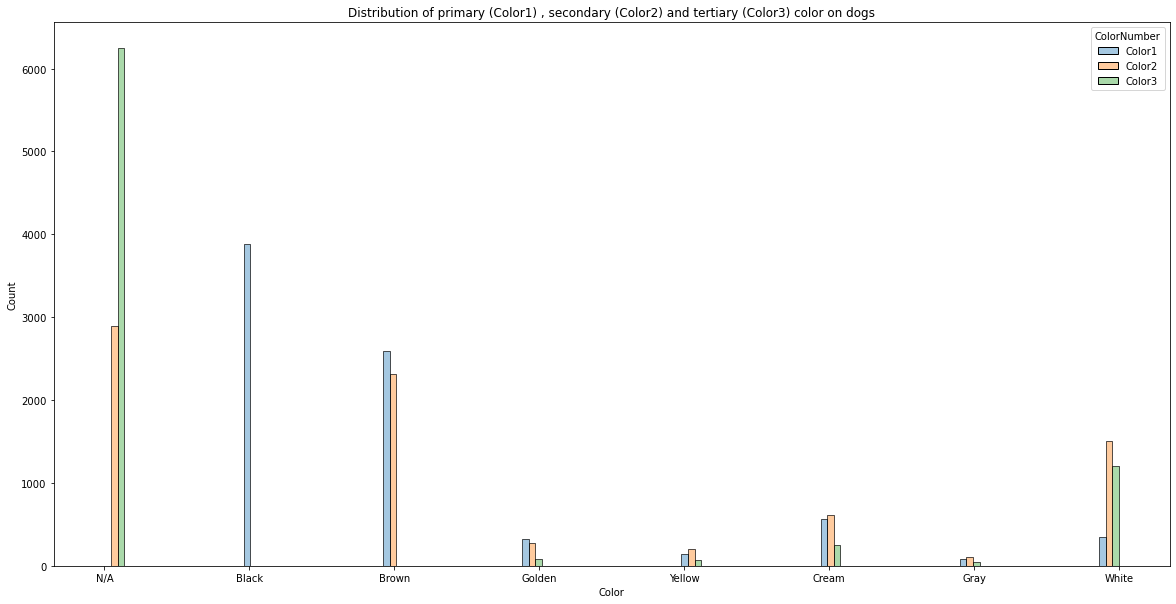

In [56]:
plt.figure(figsize = (20,10))
sns.histplot(data = colorData, x = 'ColorID', hue = 'ColorNumber', stat= 'count', alpha = 0.4, multiple = 'dodge')
plt.xticks(np.arange(0,8), ['N/A', 'Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.xlabel('Color')
plt.title('Distribution of primary (Color1) , secondary (Color2) and tertiary (Color3) color on dogs')
plt.show()

In [57]:
#Create new predictor: NumColor (1: 1 color, 2: 2 colors, 3: 3+ colors)

dogData['NumColor'] = np.where((dogData.Color3 != 0), 3, 2) #Identify pets with 3+ colors, label everything else as '2'
dogData['NumColor'] = np.where((dogData.Color2 == 0) & (dogData.NumColor == 2), 1, dogData.NumColor) #Update 2's to 1 if appropriate

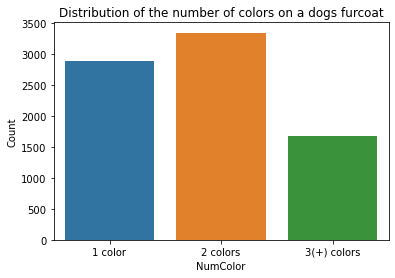

In [58]:
ax = sns.barplot(x = 'NumColor', y = 'PetID', data=dogData.groupby(['NumColor']).count().reset_index())
plt.xticks(np.arange(0,3), ["1 color", "2 colors", "3(+) colors"])
plt.ylabel('Count')
plt.title('Distribution of the number of colors on a dogs furcoat')
plt.show()

In [59]:
enc = preprocessing.OneHotEncoder()
numColorEnc = enc.fit_transform(dogData.NumColor.values.reshape(-1, 1)).toarray()
numColorOneHot = pd.DataFrame(numColorEnc, columns = ["NumColor"+str(i) for i in sorted(dogData.NumColor.unique()) ])
dogData = pd.concat([dogData, numColorOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'NumColor' column
dogData.drop(['NumColor'], axis=1, inplace = True) 
dogData.head()

,Age,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5842f1ff5,4,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
850a43f90,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
97aa9eeac,0,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8b693ca84,2,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Let's look at the distribution of the dominant color.

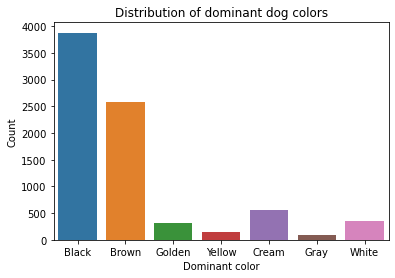

In [60]:
ax = sns.barplot(x = 'Color1', y = 'PetID', data=dogData.groupby(['Color1']).count().reset_index())
plt.xticks(np.arange(0,7), ['Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.ylabel('Count')
plt.xlabel('Dominant color')
plt.title('Distribution of dominant dog colors')
plt.show()

In [61]:
#One hot encode the dominant color (Color1) 
enc = preprocessing.OneHotEncoder()
breedEnc = enc.fit_transform(dogData.Color1.values.reshape(-1, 1)).toarray()
breedOneHot = pd.DataFrame(breedEnc, columns = ["Color_"+str(i) for i in sorted(dogData.Color1.unique()) ])
dogData = pd.concat([dogData, breedOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Breed1' & 'Breed2' columns 
dogData.drop(['Color1', 'Color2', 'Color3'], axis=1, inplace = True) 
dogData.head()

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5842f1ff5,4,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
850a43f90,1,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97aa9eeac,0,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8b693ca84,2,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
dogData.MaturitySize.value_counts()

2    6033
1    1151
3     718
4      20
Name: MaturitySize, dtype: int64

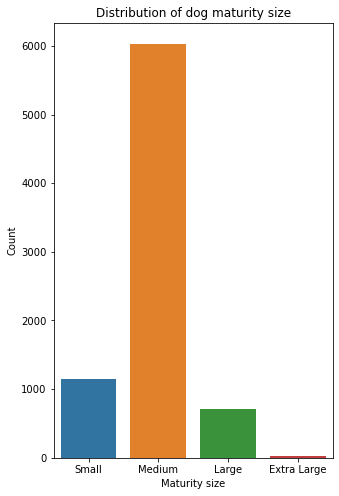

In [63]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'MaturitySize', y = 'PetID', data=dogData.groupby(['MaturitySize']).count().reset_index())
plt.xticks(np.arange(0,4), ['Small', 'Medium', 'Large', 'Extra Large'])
plt.ylabel('Count')
plt.title('Distribution of dog maturity size')
plt.xlabel('Maturity size')
plt.show()

Group 'Extra Large' with 'Large.'

In [64]:
dogData.MaturitySize = np.where((dogData['MaturitySize'] == 4), 3, dogData['MaturitySize']) 

In [65]:
dogData.MaturitySize.value_counts()

2    6033
1    1151
3     738
Name: MaturitySize, dtype: int64

In [66]:
# One hot encode maturity size
enc = preprocessing.OneHotEncoder()
sizeEnc = enc.fit_transform(dogData.MaturitySize.values.reshape(-1, 1)).toarray()
sizeOneHot = pd.DataFrame(sizeEnc, columns = ["Size_"+str(i) for i in sorted(dogData.MaturitySize.unique()) ])
dogData = pd.concat([dogData, sizeOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'MaturitySize' column
dogData.drop(['MaturitySize'], axis=1, inplace = True) 
dogData.head()

,Age,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5842f1ff5,4,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
850a43f90,1,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97aa9eeac,0,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8b693ca84,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
dogData.FurLength.value_counts()

1    4639
2    2940
3     343
Name: FurLength, dtype: int64

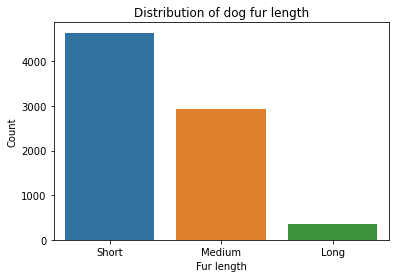

In [68]:
ax = sns.barplot(x = 'FurLength', y = 'PetID', data=dogData.groupby(['FurLength']).count().reset_index())
plt.xticks(np.arange(0,3), ['Short', 'Medium', 'Long'])
plt.ylabel('Count')
plt.title('Distribution of dog fur length')
plt.xlabel('Fur length')
plt.show()

Group 'Long' with 'Medium.'

In [69]:
dogData.FurLength = np.where((dogData['FurLength'] == 3), 2, dogData['FurLength']) 

In [70]:
dogData.FurLength.value_counts()

1    4639
2    3283
Name: FurLength, dtype: int64

In [71]:
enc = preprocessing.OneHotEncoder()
furEnc = enc.fit_transform(dogData.FurLength.values.reshape(-1, 1)).toarray()
furOneHot = pd.DataFrame(furEnc, columns = ["FurLength_"+str(i) for i in sorted(dogData.FurLength.unique()) ])
dogData = pd.concat([dogData, furOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'FurLength' column
dogData.drop(['FurLength'], axis=1, inplace = True) 
dogData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5842f1ff5,4,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
850a43f90,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
97aa9eeac,0,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8b693ca84,2,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [72]:
dogData.Vaccinated.value_counts()

1    3758
2    3010
3    1154
Name: Vaccinated, dtype: int64

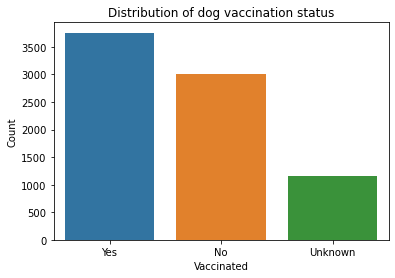

In [73]:
ax = sns.barplot(x = 'Vaccinated', y = 'PetID', data=dogData.groupby(['Vaccinated']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of dog vaccination status')
plt.xlabel('Vaccinated')
plt.show()

Group 'Unknown' with 'No.'

In [74]:
dogData.Vaccinated = np.where((dogData['Vaccinated'] == 1), 1, 0) 

In [75]:
dogData.Vaccinated.value_counts()

0    4164
1    3758
Name: Vaccinated, dtype: int64

In [76]:
enc = preprocessing.OneHotEncoder()
vaccinatedEnc = enc.fit_transform(dogData.Vaccinated.values.reshape(-1, 1)).toarray()
vaccinatedOneHot = pd.DataFrame(vaccinatedEnc, columns = ["Vaccinated_"+str(i) for i in sorted(dogData.Vaccinated.unique()) ])
dogData = pd.concat([dogData, vaccinatedOneHot.set_index(dogData['PetID'])], axis=1)
dogData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5842f1ff5,4,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
850a43f90,1,0,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
97aa9eeac,0,0,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8b693ca84,2,0,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [77]:
dogData.Dewormed.value_counts()

1    4733
2    2073
3    1116
Name: Dewormed, dtype: int64

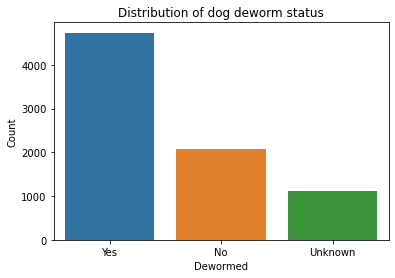

In [78]:
ax = sns.barplot(x = 'Dewormed', y = 'PetID', data=dogData.groupby(['Dewormed']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of dog deworm status')
plt.xlabel('Dewormed')
plt.show()

Assume 'Unknown's are 'No.'

In [79]:
dogData.Dewormed = np.where((dogData['Dewormed'] == 1), 1, 0) 

In [80]:
dogData.Dewormed.value_counts()

1    4733
0    3189
Name: Dewormed, dtype: int64

In [81]:
enc = preprocessing.OneHotEncoder()
dewormedEnc = enc.fit_transform(dogData.Dewormed.values.reshape(-1, 1)).toarray()
dewormedOneHot = pd.DataFrame(dewormedEnc, columns = ["Dewormed_"+str(i) for i in sorted(dogData.Dewormed.unique()) ])
dogData = pd.concat([dogData, dewormedOneHot.set_index(dogData['PetID'])], axis=1) 
dogData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5842f1ff5,4,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
850a43f90,1,0,0,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
97aa9eeac,0,0,0,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8b693ca84,2,0,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [82]:
dogData.Sterilized.value_counts()

2    5107
1    1752
3    1063
Name: Sterilized, dtype: int64

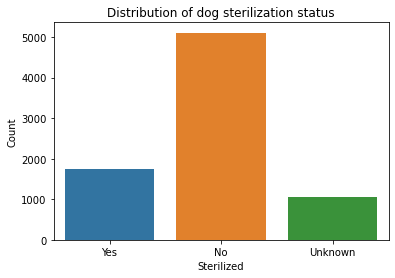

In [83]:
ax = sns.barplot(x = 'Sterilized', y = 'PetID', data=dogData.groupby(['Sterilized']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of dog sterilization status')
plt.xlabel('Sterilized')
plt.show()

Assume 'Unknown's are 'No.'

In [84]:
dogData.Sterilized = np.where((dogData['Sterilized'] == 1), 1, 0) 

In [85]:
dogData.Sterilized.value_counts()

0    6170
1    1752
Name: Sterilized, dtype: int64

In [86]:
enc = preprocessing.OneHotEncoder()
sterilizedEnc = enc.fit_transform(dogData.Sterilized.values.reshape(-1, 1)).toarray()
sterilizedOneHot = pd.DataFrame(sterilizedEnc, columns = ["Sterilized_"+str(i) for i in sorted(dogData.Sterilized.unique()) ])
dogData = pd.concat([dogData, sterilizedOneHot.set_index(dogData['PetID'])], axis=1)
dogData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,1,0,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
5842f1ff5,4,1,1,0,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
850a43f90,1,0,0,0,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
97aa9eeac,0,0,0,0,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8b693ca84,2,0,1,0,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [87]:
dogData['Preparation'] = np.where((dogData['Vaccinated'] == 1) & (dogData['Dewormed'] == 1) & (dogData['Sterilized'] == 1), 1, 0) 

In [88]:
dogData.Preparation.value_counts()

0    6504
1    1418
Name: Preparation, dtype: int64

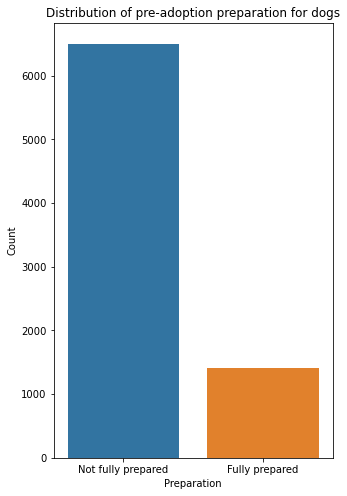

In [89]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Preparation', y = 'PetID', data=dogData.groupby(['Preparation']).count().reset_index())
plt.xticks(np.arange(0,2), ['Not fully prepared', 'Fully prepared'])
plt.ylabel('Count')
plt.title('Distribution of pre-adoption preparation for dogs')
plt.xlabel('Preparation')
plt.show()

In [90]:
enc = preprocessing.OneHotEncoder()
prepEnc = enc.fit_transform(dogData.Preparation.values.reshape(-1, 1)).toarray()
prepOneHot = pd.DataFrame(prepEnc, columns = ["Preparation_"+str(i) for i in sorted(dogData.Preparation.unique()) ])
dogData = pd.concat([dogData, prepOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Preparation' column
dogData.drop('Preparation', axis=1, inplace = True) 
dogData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,1,0,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
5842f1ff5,4,1,1,0,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
850a43f90,1,0,0,0,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
97aa9eeac,0,0,0,0,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8b693ca84,2,0,1,0,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


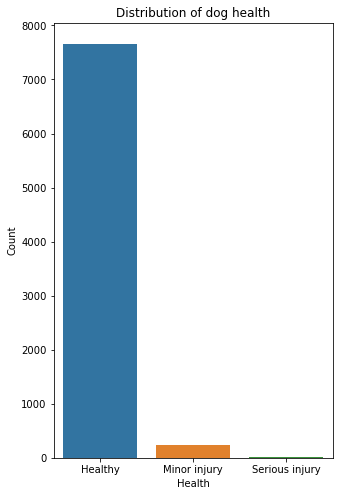

In [91]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Health', y = 'PetID', data=dogData.groupby(['Health']).count().reset_index())
plt.xticks(np.arange(0,3), ['Healthy', 'Minor injury', 'Serious injury'])
plt.ylabel('Count')
plt.title('Distribution of dog health')
plt.xlabel('Health')
plt.show()

Group 'Minor injury' and 'Serious injury' together. 

In [92]:
dogData.Health = np.where((dogData['Health'] == 1), 1, 0) 

In [93]:
dogData.Health.value_counts()

1    7663
0     259
Name: Health, dtype: int64

In [94]:
enc = preprocessing.OneHotEncoder()
healthEnc = enc.fit_transform(dogData.Health.values.reshape(-1, 1)).toarray()
healthOneHot = pd.DataFrame(healthEnc, columns = ["Health_"+str(i) for i in sorted(dogData.Health.unique()) ])
dogData = pd.concat([dogData, healthOneHot.set_index(dogData['PetID'])], axis=1)
dogData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,1,0,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
5842f1ff5,4,1,1,0,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
850a43f90,1,0,0,0,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
97aa9eeac,0,0,0,0,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8b693ca84,2,0,1,0,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


Create a new feature 'Cost' which uncovers foreseeable cost based on vaccination, deworming, sterilization and health statuses for each dog.  This value ranges from 0 to 4 with 0 representing no foreseeable costs and 4 representing 4 sources of foreseeable cost. 

In [95]:
dogData['Cost'] = 4 - (dogData.Vaccinated + dogData.Dewormed + dogData.Sterilized + dogData.Health)

In [96]:
dogData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,1,0,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
5842f1ff5,4,1,1,0,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
850a43f90,1,0,0,0,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
97aa9eeac,0,0,0,0,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
8b693ca84,2,0,1,0,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2


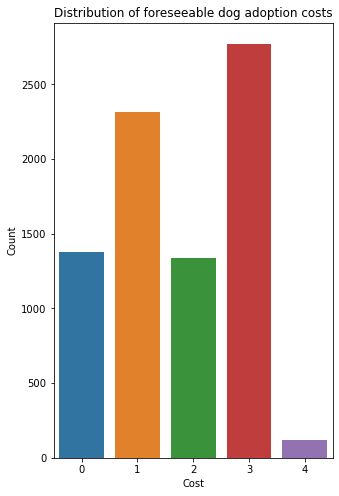

In [97]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Cost', y = 'PetID', data=dogData.groupby(['Cost']).count().reset_index())
plt.ylabel('Count')
plt.title('Distribution of foreseeable dog adoption costs')
plt.xlabel('Cost')
plt.show()

In [98]:
dogData.drop(['Vaccinated', 'Dewormed', 'Sterilized', 'Health'], axis=1, inplace = True) 
dogData.head()

,Age,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
5842f1ff5,4,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
850a43f90,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
97aa9eeac,0,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
8b693ca84,2,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2


In [99]:
dogData.Quantity.value_counts() 

1     6425
2      598
3      257
4      210
5      148
6      117
7       57
8       45
9       30
10       8
20       8
11       7
12       4
17       3
16       2
15       1
14       1
13       1
Name: Quantity, dtype: int64

In [100]:
dogData.Quantity.describe() 

count    7922.000000
mean        1.539132
std         1.554074
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        20.000000
Name: Quantity, dtype: float64

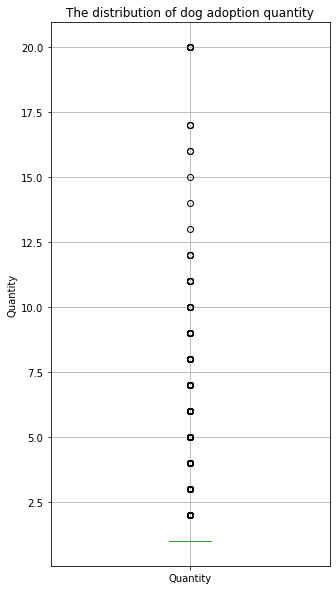

In [101]:
plt.figure(figsize = (5, 10))
dogData[['Quantity']].boxplot()
plt.ylabel('Quantity')
plt.title('The distribution of dog adoption quantity')
plt.show()

In [102]:
dogData.Fee.describe()

count    7922.000000
mean       24.248170
std        90.349573
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3000.000000
Name: Fee, dtype: float64

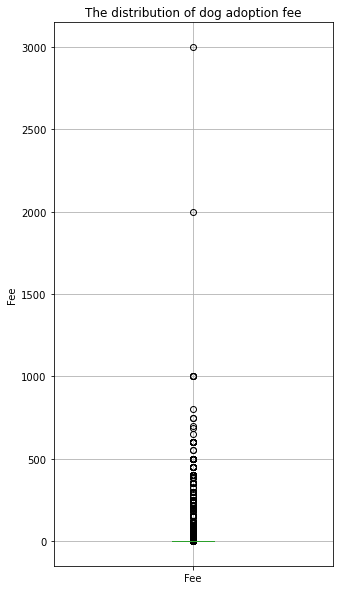

In [103]:
plt.figure(figsize = (5, 10))
dogData[['Fee']].boxplot()
plt.ylabel('Fee')
plt.title('The distribution of dog adoption fee')
plt.show()

In [104]:
z_scores = stats.zscore(dogData.Fee)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dogData = dogData[filtered_entries]

234 records were removed.

In [105]:
dogData.State.value_counts()

41326    4633
41401    1576
41327     585
41330     319
41336     252
41332     137
41324      85
41325      55
41335      33
41345       4
41367       3
41415       2
41342       2
41361       2
Name: State, dtype: int64

In [106]:
#Get density per state
density = pd.DataFrame(dogData.State.value_counts(normalize=True)).reset_index()
density.columns = ['state', 'Density']
density

,state,Density
0,41326,0.602627
1,41401,0.204995
2,41327,0.076093
3,41330,0.041493
4,41336,0.032778
5,41332,0.017820
6,41324,0.011056
7,41325,0.007154
8,41335,0.004292
9,41345,0.000520


In [107]:
dogData = dogData.join(density.set_index('state'), on='State')

In [108]:
stateCounts = dogData.State.value_counts().to_frame()

Let's only keep the top 7 states and group the rest of the states as others: 0.

In [109]:
top7States = list(stateCounts.index[:7])
dogData.State = np.where((dogData['State'].isin(top7States)), dogData['State'], 0) 

In [110]:
dogData.State.value_counts()

41326    4633
41401    1576
41327     585
41330     319
41336     252
41332     137
0         101
41324      85
Name: State, dtype: int64

In [111]:
enc = preprocessing.OneHotEncoder()
stateEnc = enc.fit_transform(dogData.State.values.reshape(-1, 1)).toarray()
stateOneHot = pd.DataFrame(stateEnc, columns = ["State_"+str(i) for i in sorted(dogData.State.unique()) ])
dogData = pd.concat([dogData, stateOneHot.set_index(dogData['PetID'])], axis=1)
# drop 'State' column
# dogData.drop(['State', 'StateName'], axis=1, inplace = True) 
dogData.drop(['State'], axis=1, inplace = True) 
dogData.head()

,Age,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41324,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,0,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5842f1ff5,4,1,150,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
850a43f90,1,1,0,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
97aa9eeac,0,6,0,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8b693ca84,2,1,0,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [112]:
pd.set_option('display.max_rows', None)
rescuerCounts = dogData.RescuerID.value_counts().to_frame()
rescuerCounts.columns = ['RescuerFreq']
rescuerCounts

,RescuerFreq
fa90fa5b1ee11c86938398b60abc32cb,455
aa66486163b6cbc25ea62a34b11c9b91,284
b53c34474d9e24574bcec6a3d3306a0d,224
c00756f2bdd8fa88fc9f07a8309f7d5d,151
ee2747ce26468ec44c7194e7d1d9dad9,143
95481e953f8aed9ec3d16fc4509537e8,130
a042471e0f43f2cf707104a1a138a7df,86
7ed6d84e2e6879245e55447aee39c328,84
8b6c5cd067ada5f54ca5ffc7f7b5d896,73
fd970cc91d06d82eebf046340137b272,71


In [113]:
dogData = dogData.join(rescuerCounts, on = 'RescuerID')
dogData.head()

,Age,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41324,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,0,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455
5842f1ff5,4,1,150,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40
850a43f90,1,1,0,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,130
97aa9eeac,0,6,0,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8b693ca84,2,1,0,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40


In [114]:
top10Rescuers = list(rescuerCounts.index[:10])
dogData.RescuerID = np.where((dogData['RescuerID'].isin(top10Rescuers)), dogData['RescuerID'], '999') 

In [115]:
dogData.RescuerID.value_counts()

999                                 5987
fa90fa5b1ee11c86938398b60abc32cb     455
aa66486163b6cbc25ea62a34b11c9b91     284
b53c34474d9e24574bcec6a3d3306a0d     224
c00756f2bdd8fa88fc9f07a8309f7d5d     151
ee2747ce26468ec44c7194e7d1d9dad9     143
95481e953f8aed9ec3d16fc4509537e8     130
a042471e0f43f2cf707104a1a138a7df      86
7ed6d84e2e6879245e55447aee39c328      84
8b6c5cd067ada5f54ca5ffc7f7b5d896      73
fd970cc91d06d82eebf046340137b272      71
Name: RescuerID, dtype: int64

In [116]:
enc = preprocessing.OneHotEncoder()
rescuerEnc = enc.fit_transform(dogData.RescuerID.values.reshape(-1, 1)).toarray()
rescuerOneHot = pd.DataFrame(rescuerEnc, columns = ["Rescuer_"+str(i) for i in sorted(dogData.RescuerID.unique())])
dogData = pd.concat([dogData, rescuerOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'RescuerID' column
dogData.drop('RescuerID', axis=1, inplace = True) 
dogData.head()

,Age,Quantity,Fee,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41324,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq,Rescuer_7ed6d84e2e6879245e55447aee39c328,Rescuer_8b6c5cd067ada5f54ca5ffc7f7b5d896,Rescuer_95481e953f8aed9ec3d16fc4509537e8,Rescuer_999,Rescuer_a042471e0f43f2cf707104a1a138a7df,Rescuer_aa66486163b6cbc25ea62a34b11c9b91,Rescuer_b53c34474d9e24574bcec6a3d3306a0d,Rescuer_c00756f2bdd8fa88fc9f07a8309f7d5d,Rescuer_ee2747ce26468ec44c7194e7d1d9dad9,Rescuer_fa90fa5b1ee11c86938398b60abc32cb,Rescuer_fd970cc91d06d82eebf046340137b272
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,0,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5842f1ff5,4,1,150,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
850a43f90,1,1,0,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97aa9eeac,0,6,0,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8b693ca84,2,1,0,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
dogData.VideoAmt.value_counts() 

0    7387
1     214
2      45
3      24
4      10
5       4
8       2
7       1
6       1
Name: VideoAmt, dtype: int64

In [118]:
dogData.VideoAmt.describe()

count    7688.000000
mean        0.060484
std         0.370444
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: VideoAmt, dtype: float64

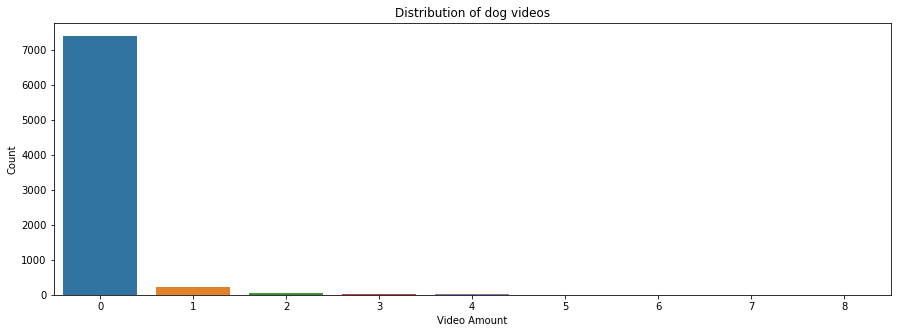

In [119]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'VideoAmt', y = 'PetID', data=dogData.groupby(['VideoAmt']).count().reset_index())
plt.ylabel('Count')
plt.title('Distribution of dog videos')
plt.xlabel('Video Amount')
plt.show()

In [120]:
dogData.PhotoAmt.value_counts() 

1.0     1756
2.0     1384
3.0     1220
5.0      991
4.0      896
6.0      311
7.0      207
0.0      181
8.0      171
9.0      111
10.0      98
11.0      96
13.0      44
14.0      43
12.0      40
15.0      20
16.0      18
20.0      14
21.0      11
24.0      10
18.0      10
30.0      10
17.0       9
19.0       8
23.0       6
28.0       5
22.0       5
26.0       5
29.0       4
25.0       3
27.0       1
Name: PhotoAmt, dtype: int64

In [121]:
dogData.PhotoAmt.describe()

count    7688.000000
mean        3.766259
std         3.507226
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: PhotoAmt, dtype: float64

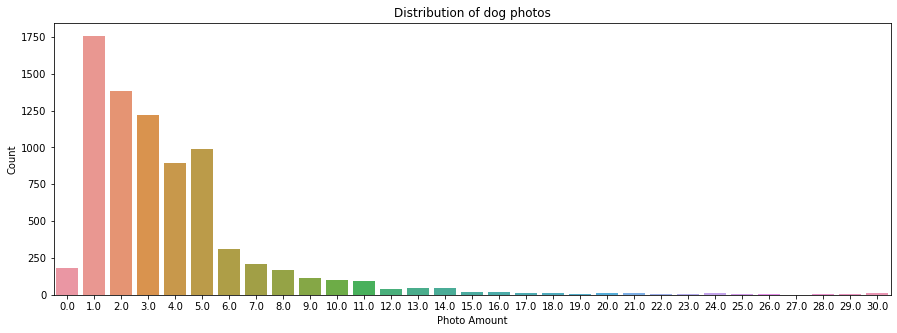

In [122]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'PhotoAmt', y = 'PetID', data=dogData.groupby(['PhotoAmt']).count().reset_index())
plt.ylabel('Count')
plt.title('Distribution of dog photos')
plt.xlabel('Photo Amount')
plt.show()

In [123]:
dogData['Media'] = np.where((dogData['VideoAmt'] >= 1) | (dogData['PhotoAmt'] >= 1), 1, 0) 

In [124]:
dogData.Media.value_counts()

1    7507
0     181
Name: Media, dtype: int64

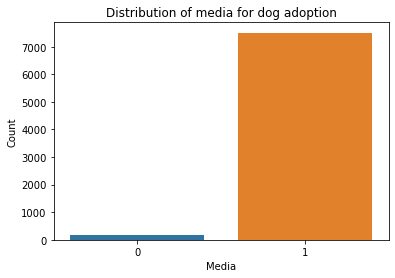

In [125]:
ax = sns.barplot(x = 'Media', y = 'PetID', data=dogData.groupby(['Media']).count().reset_index())
plt.ylabel('Count')
plt.title('Distribution of media for dog adoption')
plt.xlabel('Media')
plt.show()

In [126]:
enc = preprocessing.OneHotEncoder()
mediaEnc = enc.fit_transform(dogData.Media.values.reshape(-1, 1)).toarray()
mediaOneHot = pd.DataFrame(mediaEnc, columns = ["Media_"+str(i) for i in sorted(dogData.Media.unique()) ])
dogData = pd.concat([dogData, mediaOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Media' column
dogData.drop(['Media'], axis=1, inplace = True) 
dogData.head()

,Age,Quantity,Fee,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41324,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq,Rescuer_7ed6d84e2e6879245e55447aee39c328,Rescuer_8b6c5cd067ada5f54ca5ffc7f7b5d896,Rescuer_95481e953f8aed9ec3d16fc4509537e8,Rescuer_999,Rescuer_a042471e0f43f2cf707104a1a138a7df,Rescuer_aa66486163b6cbc25ea62a34b11c9b91,Rescuer_b53c34474d9e24574bcec6a3d3306a0d,Rescuer_c00756f2bdd8fa88fc9f07a8309f7d5d,Rescuer_ee2747ce26468ec44c7194e7d1d9dad9,Rescuer_fa90fa5b1ee11c86938398b60abc32cb,Rescuer_fd970cc91d06d82eebf046340137b272,Media_0,Media_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,0,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5842f1ff5,4,1,150,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
850a43f90,1,1,0,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97aa9eeac,0,6,0,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8b693ca84,2,1,0,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [127]:
dogData['DescLen'] = dogData['Description'].str.len()

In [128]:
dogData.DescLen.describe()

count    7685.000000
mean      322.258816
std       353.744849
min         1.000000
25%       115.000000
50%       227.000000
75%       406.000000
max      6664.000000
Name: DescLen, dtype: float64

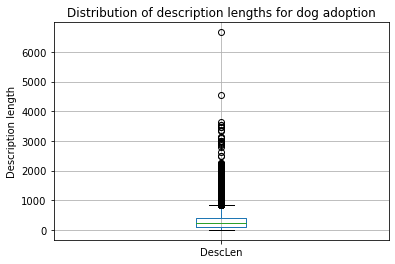

In [129]:
dogData[['DescLen']].boxplot()
plt.ylabel('Description length')
plt.title('Distribution of description lengths for dog adoption')
plt.show()

In [130]:
# Set observations with 'DescLen' na to 0
dogData['DescLen'] = np.where(dogData['DescLen'].isna(), 0, dogData['DescLen']) 

In [131]:
dogData['DescNumWords'] = dogData.Description.str.split().str.len()
dogData.head()

,Age,Quantity,Fee,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41324,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq,Rescuer_7ed6d84e2e6879245e55447aee39c328,Rescuer_8b6c5cd067ada5f54ca5ffc7f7b5d896,Rescuer_95481e953f8aed9ec3d16fc4509537e8,Rescuer_999,Rescuer_a042471e0f43f2cf707104a1a138a7df,Rescuer_aa66486163b6cbc25ea62a34b11c9b91,Rescuer_b53c34474d9e24574bcec6a3d3306a0d,Rescuer_c00756f2bdd8fa88fc9f07a8309f7d5d,Rescuer_ee2747ce26468ec44c7194e7d1d9dad9,Rescuer_fa90fa5b1ee11c86938398b60abc32cb,Rescuer_fd970cc91d06d82eebf046340137b272,Media_0,Media_1,DescLen,DescNumWords
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,0,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,393.0,69.0
5842f1ff5,4,1,150,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,146.0,25.0
850a43f90,1,1,0,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,390.0,81.0
97aa9eeac,0,6,0,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,109.0,20.0
8b693ca84,2,1,0,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,12.0


In [132]:
# Set observations with 'DescNumWords' na to 0
dogData['DescNumWords'] = np.where(dogData['DescNumWords'].isna(), 0, dogData['DescNumWords']) 

In [133]:
dogData.DescNumWords.describe()

count    7688.000000
mean       59.815947
std        65.813247
min         0.000000
25%        21.000000
50%        42.000000
75%        76.000000
max      1257.000000
Name: DescNumWords, dtype: float64

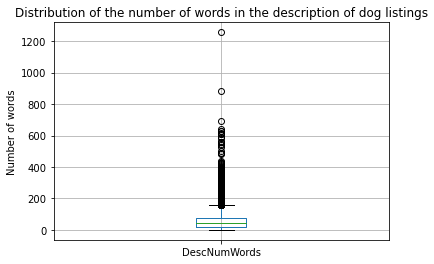

In [134]:
dogData[['DescNumWords']].boxplot()
plt.ylabel('Number of words')
plt.title('Distribution of the number of words in the description of dog listings')
plt.show()

In [135]:
tfidf = TfidfVectorizer(stop_words='english', strip_accents = "ascii", max_features = 100)
features = tfidf.fit_transform(dogData['Description'].values.astype('U'))
tfidf.get_feature_names()

['abandoned',
 'active',
 'adopt',
 'adopted',
 'adopter',
 'adopters',
 'adoption',
 'adorable',
 'age',
 'area',
 'attention',
 'black',
 'boy',
 'breed',
 'brown',
 'caging',
 'care',
 'compulsory',
 'contact',
 'currently',
 'cute',
 'day',
 'dewormed',
 'dog',
 'dogs',
 'don',
 'family',
 'female',
 'food',
 'forever',
 'friend',
 'friendly',
 'girl',
 'good',
 'guard',
 'happy',
 'healthy',
 'help',
 'home',
 'hope',
 'house',
 'interested',
 'just',
 'kind',
 'klang',
 'know',
 'left',
 'life',
 'like',
 'little',
 'long',
 'look',
 'looking',
 'love',
 'lovely',
 'loves',
 'loving',
 'make',
 'male',
 'month',
 'months',
 'mother',
 'near',
 'need',
 'needs',
 'neutering',
 'new',
 'old',
 'owner',
 'people',
 'pet',
 'place',
 'play',
 'playful',
 'pls',
 'provide',
 'pup',
 'puppies',
 'puppy',
 'pups',
 'really',
 'rescued',
 'shelter',
 'siblings',
 'small',
 'smart',
 'spay',
 'spayed',
 'stray',
 'sweet',
 'thank',
 'thanks',
 'time',
 'trained',
 'vaccinated',
 'vaccinat

In [136]:
keywordsDf = pd.DataFrame(features.todense(), columns = tfidf.get_feature_names())
keywordsDf.head()

,abandoned,active,adopt,adopted,adopter,adopters,adoption,adorable,age,area,attention,black,boy,breed,brown,caging,care,compulsory,contact,currently,cute,day,dewormed,dog,dogs,don,family,female,food,forever,friend,friendly,girl,good,guard,happy,healthy,help,home,hope,house,interested,just,kind,klang,know,left,life,like,little,long,look,looking,love,lovely,loves,loving,make,male,month,months,mother,near,need,needs,neutering,new,old,owner,people,pet,place,play,playful,pls,provide,pup,puppies,puppy,pups,really,rescued,shelter,siblings,small,smart,spay,spayed,stray,sweet,thank,thanks,time,trained,vaccinated,vaccination,vet,want,weeks,white
0,0.0,0.000000,0.188171,0.0,0.000000,0.0,0.000000,0.255663,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.295301,0.000000,0.0,0.0,0.0,0.000000,0.0,0.300408,0.00000,0.215948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.291059,0.0,0.229963,0.0,0.137177,0.0,0.0,0.196611,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.26944,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.284051,0.306332,0.0,0.000000,0.0,0.0,0.0,0.225237,0.0,0.0,0.0,0.0,0.000000,0.236028,0.0,0.0,0.212759,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.285036,0.0,0.0,0.0,0.0,0.0
1,0.0,0.325766,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.22078,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512679,0.405047,0.0,0.000000,0.0,0.000000,0.0,0.0,0.273610,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.416932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411746,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.189196,0.0,0.000000,0.0,0.185977,0.000000,0.307779,0.0,0.0,0.0,0.310248,0.0,0.0,0.000000,0.232251,0.0,0.0,0.0,0.470896,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.137924,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.247217,0.0,0.00000,0.0,0.201249,0.225578,0.0,0.261078,0.211753,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.286257,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.225212,0.000000,0.0,0.0,0.213918,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.358812,0.471124,0.0,0.0,0.0,0.559454,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.430748,0.0,0.0,0.388282,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.633962,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773364,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [137]:
# Extract top 20 relevant keywords
dogKeywords = ['abandoned', 'active', 'adorable', 'cute', 'family', 'friendly', 'good', 'guard', 'happy', 'healthy', 'hope', 'kind', 'little', 'lovely', 'mother', 'playful', 'siblings', 'smart', 'sweet', 'trained']
keywordsDf = keywordsDf[dogKeywords]

In [138]:
dogData = dogData.join(keywordsDf.set_index(dogData['PetID']))
for kw in dogKeywords:
    dogData[kw] = np.where(dogData['Description'].str.contains(kw, na = False), 1, 0)
dogData.drop(columns = 'Description', inplace = True)
dogData.head()

,Age,Quantity,Fee,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,PureBreed_0,PureBreed_1,Breed_20,Breed_103,Breed_109,Breed_141,Breed_179,Breed_189,Breed_205,Breed_213,Breed_218,Breed_307,Breed_999,Gender_1,Gender_2,Gender_3,NumColor1,NumColor2,NumColor3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41324,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq,Rescuer_7ed6d84e2e6879245e55447aee39c328,Rescuer_8b6c5cd067ada5f54ca5ffc7f7b5d896,Rescuer_95481e953f8aed9ec3d16fc4509537e8,Rescuer_999,Rescuer_a042471e0f43f2cf707104a1a138a7df,Rescuer_aa66486163b6cbc25ea62a34b11c9b91,Rescuer_b53c34474d9e24574bcec6a3d3306a0d,Rescuer_c00756f2bdd8fa88fc9f07a8309f7d5d,Rescuer_ee2747ce26468ec44c7194e7d1d9dad9,Rescuer_fa90fa5b1ee11c86938398b60abc32cb,Rescuer_fd970cc91d06d82eebf046340137b272,Media_0,Media_1,DescLen,DescNumWords,abandoned,active,adorable,cute,family,friendly,good,guard,happy,healthy,hope,kind,little,lovely,mother,playful,siblings,smart,sweet,trained
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,0,0,3422e4906,7.0,3,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,393.0,69.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
5842f1ff5,4,1,150,0,5842f1ff5,8.0,2,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,146.0,25.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
850a43f90,1,1,0,0,850a43f90,3.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,390.0,81.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
97aa9eeac,0,6,0,0,97aa9eeac,9.0,3,0.0,1.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.602627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,109.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8b693ca84,2,1,0,0,8b693ca84,7.0,1,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2,0.204995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Output cleaned  dog dataframe into CSV. 

In [139]:
dogData.drop(columns = 'PetID').convert_dtypes().to_csv (r'dogData.csv', index = True, header=True)

### Cat data analysis

In [140]:
catData.head()

,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
6296e909a,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
d24c30b4b,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
1caa6fcdb,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
c06d167ca,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1


In [141]:
catData['HasName'] = np.where(catData.Name.isna(), 0, 1)

In [142]:
catData.HasName.value_counts()

1    6253
0     608
Name: HasName, dtype: int64

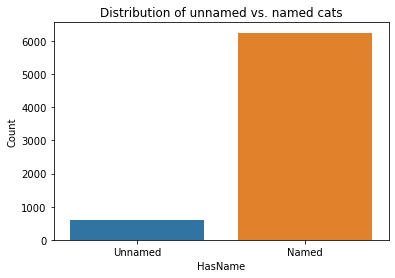

In [143]:
ax = sns.barplot(x = 'HasName', y = 'PetID', data=catData.groupby(['HasName']).count().reset_index())
plt.xticks(np.arange(0,2), ["Unnamed", "Named"])
plt.ylabel('Count')
plt.title('Distribution of unnamed vs. named cats')
plt.show()

In [144]:
enc = preprocessing.OneHotEncoder()
hasNameEnc = enc.fit_transform(catData.HasName.values.reshape(-1, 1)).toarray()
hasNameOneHot = pd.DataFrame(hasNameEnc, columns = ["HasName_"+str(i) for i in sorted(catData.HasName.unique()) ])
catData = pd.concat([catData, hasNameOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'HasName' column
catData.drop(['HasName'], axis=1, inplace = True) 
catData.head()

,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0
6296e909a,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0
d24c30b4b,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0
1caa6fcdb,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0
c06d167ca,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0


In [145]:
catData['NameLen'] = catData['Name'].str.len()

In [146]:
# Set observations with 'NameLen' na to 0
catData['NameLen'] = np.where(catData['NameLen'].isna(), 0, catData['NameLen']) 

In [147]:
catData.NameLen.describe()

count    6861.000000
mean        9.137152
std         7.652397
min         0.000000
25%         4.000000
50%         6.000000
75%        12.000000
max        47.000000
Name: NameLen, dtype: float64

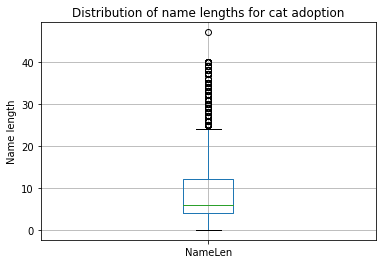

In [148]:
catData[['NameLen']].boxplot()
plt.ylabel('Name length')
plt.title('Distribution of name lengths for cat adoption')
plt.show()

In [149]:
catData['NameNumWords'] = catData.Name.str.split().str.len()
catData.head()

,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0
6296e909a,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0
d24c30b4b,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,NaN
1caa6fcdb,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0
c06d167ca,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,NaN


In [150]:
# Set observations with 'NameNumWords' na to 0
catData['NameNumWords'] = np.where(catData['NameNumWords'].isna(), 0, catData['NameNumWords']) 

In [151]:
catData.NameNumWords.describe()

count    6861.000000
mean        1.730360
std         1.367744
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: NameNumWords, dtype: float64

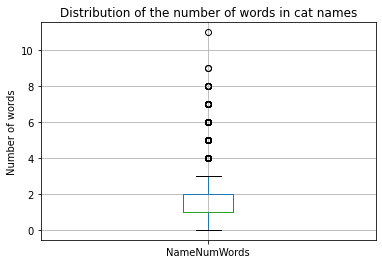

In [152]:
catData[['NameNumWords']].boxplot()
plt.ylabel('Number of words')
plt.title('Distribution of the number of words in cat names')
plt.show()

In [153]:
# Drop Name feature
catData.drop(columns = 'Name', inplace = True)

In [154]:
catData.Age.describe()

count    6861.000000
mean        7.543361
std        12.771554
min         0.000000
25%         2.000000
50%         3.000000
75%         8.000000
max       212.000000
Name: Age, dtype: float64

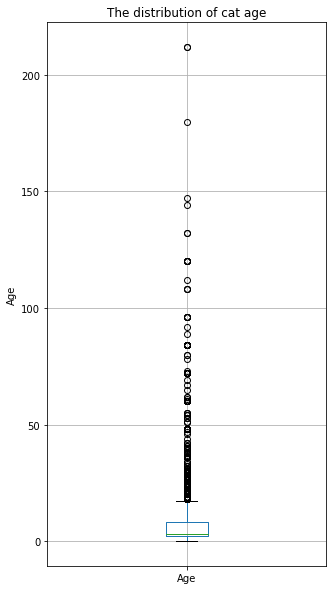

In [155]:
plt.figure(figsize = (5, 10))
catData[['Age']].boxplot()
plt.ylabel('Age')
plt.title('The distribution of cat age')
plt.show()

In [156]:
z_scores = stats.zscore(catData.Age)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
catData = catData[filtered_entries]

168 records were dropped. 

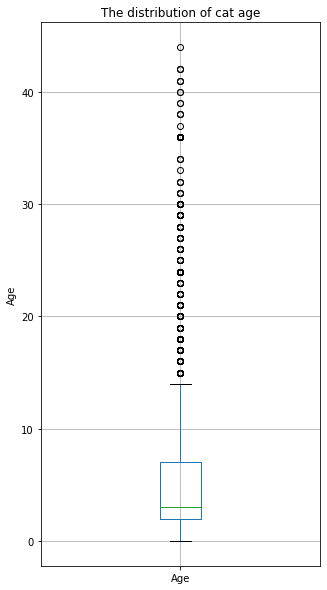

In [157]:
plt.figure(figsize = (5, 10))
catData[['Age']].boxplot()
plt.ylabel('Age')
plt.title('The distribution of cat age')
plt.show()

Create a new feature 'ThreeMonths' which determines whether a cat is above or below 3 months of age.

In [158]:
catData['ThreeMonths'] = np.where(catData['Age'] <= 3, 1, 0) 
catData.ThreeMonths.value_counts()

1    3656
0    3037
Name: ThreeMonths, dtype: int64

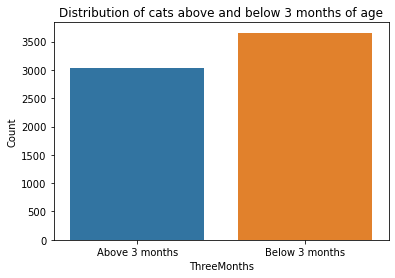

In [159]:
ax = sns.barplot(x = 'ThreeMonths', y = 'PetID', data=catData.groupby(['ThreeMonths']).count().reset_index())
plt.xticks(np.arange(0,2), ["Above 3 months", "Below 3 months"])
plt.ylabel('Count')
plt.title('Distribution of cats above and below 3 months of age')
plt.show()

In [160]:
enc = preprocessing.OneHotEncoder()
threeMonthsEnc = enc.fit_transform(catData.ThreeMonths.values.reshape(-1, 1)).toarray()
threeMonthsOneHot = pd.DataFrame(threeMonthsEnc, columns = ["ThreeMonths_"+str(i) for i in sorted(catData.ThreeMonths.unique()) ])
catData = pd.concat([catData, threeMonthsOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'ThreeMonths' column
catData.drop(['ThreeMonths'], axis=1, inplace = True) 
catData.head()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0
6296e909a,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0
d24c30b4b,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0
1caa6fcdb,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0
c06d167ca,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0


In [161]:
catData[catData['Breed1'] == 0] 

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27e74e45c,3,0,266,3,1,4,7,1,1,2,1,2,1,3,0,41401,f7cff59d10c867bdee12c3f35f34d086,0,Mama cat came to house and gave birth to these...,27e74e45c,11.0,2,1.0,0.0,0.0,0.0,0.0,1.0


In [162]:
#There appears to be some breeds mistakenly filled into Breed2 instead of Breed1, let's fix this.
catData.Breed1 = np.where((catData['Breed1']==0) & (catData['Breed2']!=0), catData['Breed2'], catData['Breed1']) #If breed1 = 0 but not breed2, set breed1 to breed2 and breed2 to 0
catData.Breed2 = np.where((catData['Breed1']== catData['Breed2']), 0, catData['Breed2'])  #If breed1 = breed2, set breed2 to 0

In [163]:
# Check that there are no dog breeds accidentally inputted into the cat adoption dataset 
incorrectBreeds = catData[((catData['Breed1'] < 241) & (catData['Breed1'] != 0)) | ((catData['Breed2'] < 241) & (catData['Breed2'] != 0))]
incorrectBreeds

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1bc0f89d8,0,114,0,3,3,6,7,2,2,2,2,3,1,10,0,41401,97be67995b53f86f64be212c867009fa,0,"My cats name is Kenit, Kenot,Owen, Keyad, Manj...",1bc0f89d8,0.0,4,0.0,1.0,33.0,5.0,0.0,1.0
15a206d0d,3,25,0,2,6,0,0,1,1,2,1,2,1,1,0,41401,4e271c777d05f0d87034c9db0ea6663f,0,so cute and kind,15a206d0d,2.0,4,0.0,1.0,5.0,1.0,0.0,1.0
f8654865f,1,21,0,1,1,3,6,2,1,2,2,2,1,5,0,41401,f3e6eb8b610ab73fb0b2f91cc4195091,0,New born baby cats 2 weeks time..at my house a...,f8654865f,5.0,3,0.0,1.0,8.0,3.0,0.0,1.0
36b20cfb5,3,25,0,3,1,3,6,2,1,2,2,2,1,2,0,41401,969f67f283480a4d6c52173f80a10f75,0,"THERE ARE FOUR KITTENS GINGER, BLACKIE, SILVER...",36b20cfb5,0.0,4,1.0,0.0,0.0,0.0,0.0,1.0
699a81c51,1,218,0,1,2,7,0,3,3,2,2,2,1,1,25,41326,35ca0af7f781e96744e8371c35b07944,0,Mo-joe is adopted and is in good hand with sof...,699a81c51,3.0,0,0.0,1.0,6.0,1.0,0.0,1.0
85ec1aac0,1,15,0,1,1,7,0,1,1,2,2,2,1,1,0,41345,ec0c78ffa25dae7dffdb9669b9ac9e95,0,He's very naughty and cute ..,85ec1aac0,1.0,4,0.0,1.0,6.0,1.0,0.0,1.0
6a72cfda7,1,70,5,2,2,0,0,1,1,2,1,2,1,1,0,41326,35ca0af7f781e96744e8371c35b07944,0,i rescued mao mao last two weeks or 3 weeks ag...,6a72cfda7,3.0,0,0.0,1.0,7.0,2.0,0.0,1.0
6c399cb06,36,205,0,1,2,5,7,2,3,3,3,2,1,1,0,41336,0e9d19f9046c000d494f2f7496ef6482,0,How he was found: Bobby was abandoned and was ...,6c399cb06,2.0,1,0.0,1.0,26.0,5.0,1.0,0.0


In [164]:
# Drop the above records
catData.drop(incorrectBreeds.index, inplace = True)

In [165]:
# Domestic breeds
catData['DomesticBreed'] = np.where((catData.Breed1 == 264) | (catData.Breed1 == 265) | (catData.Breed1 == 266) | (catData.Breed2 == 264) | (catData.Breed2 == 265) | (catData.Breed2 == 266), 1, 0)

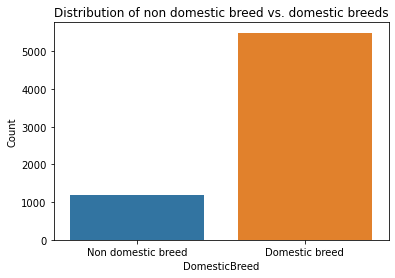

In [166]:
ax = sns.barplot(x = 'DomesticBreed', y = 'PetID', data=catData.groupby(['DomesticBreed']).count().reset_index())
plt.xticks(np.arange(0,2), ["Non domestic breed", "Domestic breed"])
plt.ylabel('Count')
plt.title('Distribution of non domestic breed vs. domestic breeds')
plt.show()

In [167]:
enc = preprocessing.OneHotEncoder()
domesticBreedEnc = enc.fit_transform(catData.DomesticBreed.values.reshape(-1, 1)).toarray()
domesticBreedOneHot = pd.DataFrame(domesticBreedEnc, columns = ["DomesticBreed_"+str(i) for i in sorted(catData.DomesticBreed.unique())])
catData = pd.concat([catData, domesticBreedOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'DomesticBreed' column
catData.drop(['DomesticBreed'], axis=1, inplace = True) 
catData.head()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0
6296e909a,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0
d24c30b4b,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1caa6fcdb,12,264,0,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0
c06d167ca,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [168]:
#Create new predictor variable: pureBreed
# Note that breed 264 (domestic long hair) , 265 (domestic medium hair) and 266 (domestic short hair) are also considered mixed breed cats
catData['PureBreed'] = np.where((catData.Breed2 == 0) & (catData.Breed1 != 307) & (catData.Breed1 != 264) & (catData.Breed1 != 265) & (catData.Breed1 != 266), 1, 0)

##### ax = sns.barplot(x = 'PureBreed', y = 'PetID', data=catData.groupby(['PureBreed']).count().reset_index())
plt.xticks(np.arange(0,2), ["Mixed breed", "Pure breed"])
plt.ylabel('Count')
plt.title('Distribution of mixed breed vs. pure breeds cats')
plt.show()

In [169]:
enc = preprocessing.OneHotEncoder()
pureBreedEnc = enc.fit_transform(catData.PureBreed.values.reshape(-1, 1)).toarray()
pureBreedOneHot = pd.DataFrame(pureBreedEnc, columns = ["PureBreed_"+str(i) for i in sorted(catData.PureBreed.unique())])
catData = pd.concat([catData, pureBreedOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'PureBreed' column
catData.drop(['PureBreed'], axis=1, inplace = True) 
catData.head()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
6296e909a,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0
d24c30b4b,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1caa6fcdb,12,264,0,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
c06d167ca,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [170]:
breedCounts = catData.Breed1.value_counts(normalize = True).to_frame()

In [171]:
breedCounts.head(15)

,Breed1
266,0.532835
265,0.185490
299,0.049963
264,0.042932
292,0.038893
285,0.030366
254,0.015408
243,0.013613
283,0.010471
247,0.010322


Let's only keep the top 10 most prominent breeds and group the rest of the breeds as others: 999.

In [172]:
top10Breeds = list(breedCounts.index[:10])
catData.Breed1 = np.where((catData['Breed1'].isin(top10Breeds)), catData['Breed1'], 999) 

In [173]:
catData.Breed1.value_counts()

266    3562
265    1240
999     466
299     334
264     287
292     260
285     203
254     103
243      91
283      70
247      69
Name: Breed1, dtype: int64

In [174]:
enc = preprocessing.OneHotEncoder()
breedEnc = enc.fit_transform(catData.Breed1.values.reshape(-1, 1)).toarray()
breedOneHot = pd.DataFrame(breedEnc, columns = ["Breed_"+str(i) for i in sorted(catData.Breed1.unique()) ])
catData = pd.concat([catData, breedOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'Breed1' & 'Breed2' columns 
catData.drop(['Breed1', 'Breed2'], axis=1, inplace = True) 
catData.head()

,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6296e909a,1,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
d24c30b4b,3,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1caa6fcdb,12,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c06d167ca,2,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
catData.Gender.value_counts()

2    2938
1    2459
3    1288
Name: Gender, dtype: int64

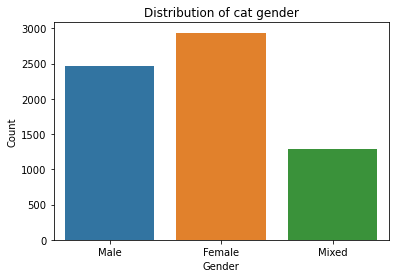

In [176]:
ax = sns.barplot(x = 'Gender', y = 'PetID', data=catData.groupby(['Gender']).count().reset_index())
plt.xticks(np.arange(0,3), ["Male", "Female", "Mixed"])
plt.ylabel('Count')
plt.title('Distribution of cat gender')
plt.show()

In [177]:
enc = preprocessing.OneHotEncoder()
genderEnc = enc.fit_transform(catData.Gender.values.reshape(-1, 1)).toarray()
genderOneHot = pd.DataFrame(genderEnc, columns = ["Gender_"+str(i) for i in sorted(catData.Gender.unique()) ])
catData = pd.concat([catData, genderOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'Gender' column
catData.drop(['Gender'], axis=1, inplace = True) 
catData.head()

,Age,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6296e909a,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
d24c30b4b,3,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1caa6fcdb,12,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
c06d167ca,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [178]:
catData.Color1.value_counts(dropna = False)

1    3410
2    1053
3     590
6     565
4     476
5     297
7     294
Name: Color1, dtype: int64

In [179]:
catData.Color2.value_counts()

7    1844
0    1434
2     948
6     918
4     649
5     486
3     406
Name: Color2, dtype: int64

In [180]:
catData.Color3.value_counts()

0    4083
7    1935
6     318
5     150
4     117
3      82
Name: Color3, dtype: int64

In [181]:
#Reshape color data to be in the format for generating a histogram
colorData = pd.melt(catData, id_vars = 'PetID', value_vars = ['Color1', 'Color2', 'Color3'], var_name = 'ColorNumber', value_name = 'ColorID')

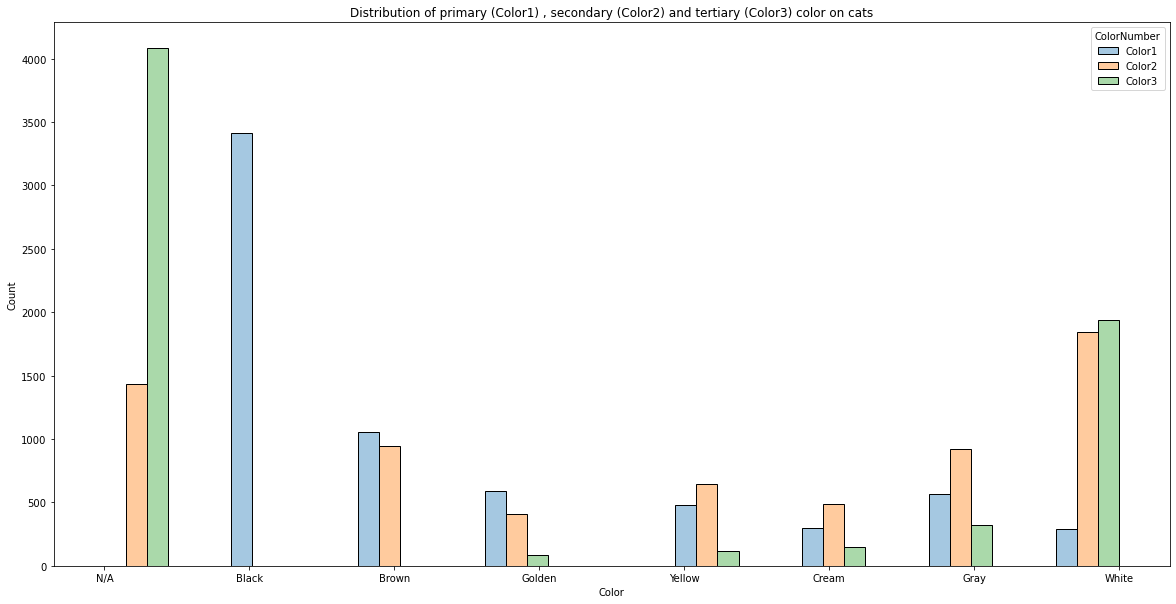

In [182]:
plt.figure(figsize = (20,10))
sns.histplot(data = colorData, x = 'ColorID', hue = 'ColorNumber', stat= 'count', alpha = 0.4, multiple = 'dodge')
plt.xticks(np.arange(0,8), ['N/A', 'Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.xlabel('Color')
plt.title('Distribution of primary (Color1) , secondary (Color2) and tertiary (Color3) color on cats')
plt.show()

In [183]:
#Create new predictor: NumColor (1: 1 color, 2: 2 colors, 3: 3+ colors)

catData['NumColor'] = np.where((catData.Color3 != 0), 3, 2) #Identify pets with 3+ colors, label everything else as '2'
catData['NumColor'] = np.where((catData.Color2 == 0) & (catData.NumColor == 2), 1, catData.NumColor) #Update 2's to 1 if appropriate

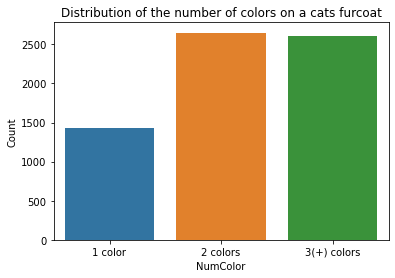

In [184]:
ax = sns.barplot(x = 'NumColor', y = 'PetID', data=catData.groupby(['NumColor']).count().reset_index())
plt.xticks(np.arange(0,3), ["1 color", "2 colors", "3(+) colors"])
plt.ylabel('Count')
plt.title('Distribution of the number of colors on a cats furcoat')
plt.show()

In [185]:
enc = preprocessing.OneHotEncoder()
numColorEnc = enc.fit_transform(catData.NumColor.values.reshape(-1, 1)).toarray()
numColorOneHot = pd.DataFrame(numColorEnc,columns = ["NumColor_"+str(i) for i in sorted(catData.NumColor.unique()) ])
catData = pd.concat([catData, numColorOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'NumColor' column
catData.drop(['NumColor'], axis=1, inplace = True) 
catData.head()

,Age,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6296e909a,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
d24c30b4b,3,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1caa6fcdb,12,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
c06d167ca,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


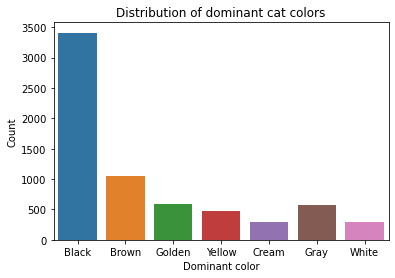

In [186]:
ax = sns.barplot(x = 'Color1', y = 'PetID', data=catData.groupby(['Color1']).count().reset_index())
plt.xticks(np.arange(0,7), ['Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.ylabel('Count')
plt.xlabel('Dominant color')
plt.title('Distribution of dominant cat colors')
plt.show()

In [187]:
#One hot encode the dominant color (Color1) 
enc = preprocessing.OneHotEncoder()
colorEnc = enc.fit_transform(catData.Color1.values.reshape(-1, 1)).toarray()
colorOneHot = pd.DataFrame(colorEnc, columns = ["Color_"+str(i) for i in sorted(catData.Color1.unique()) ])
catData = pd.concat([catData, colorOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'Color1', 'Color2' & 'Color3' columns 
catData.drop(['Color1', 'Color2', 'Color3'], axis=1, inplace = True) 
catData.head()

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6296e909a,1,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
d24c30b4b,3,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1caa6fcdb,12,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
c06d167ca,2,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [188]:
catData.MaturitySize.value_counts()

2    4071
1    2157
3     448
4       9
Name: MaturitySize, dtype: int64

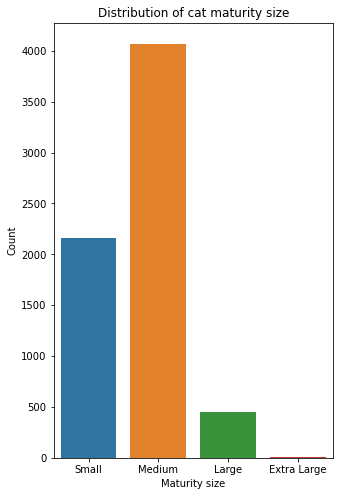

In [189]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'MaturitySize', y = 'PetID', data=catData.groupby(['MaturitySize']).count().reset_index())
plt.xticks(np.arange(0,4), ['Small', 'Medium', 'Large', 'Extra Large'])
plt.ylabel('Count')
plt.title('Distribution of cat maturity size')
plt.xlabel('Maturity size')
plt.show()

Group 'Extra Large' with 'Large.'

In [190]:
catData['MaturitySize'] = np.where(catData.MaturitySize == 4, 3, catData.MaturitySize)

In [191]:
catData.MaturitySize.value_counts()

2    4071
1    2157
3     457
Name: MaturitySize, dtype: int64

In [192]:
# One hot encode maturity size
enc = preprocessing.OneHotEncoder()
sizeEnc = enc.fit_transform(catData.MaturitySize.values.reshape(-1, 1)).toarray()
sizeOneHot = pd.DataFrame(sizeEnc, columns = ["Size_"+str(i) for i in sorted(catData.MaturitySize.unique()) ])
catData = pd.concat([catData, sizeOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'MaturitySize' column
catData.drop(['MaturitySize'], axis=1, inplace = True) 
catData.head()

,Age,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6296e909a,1,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
d24c30b4b,3,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1caa6fcdb,12,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
c06d167ca,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [193]:
catData.FurLength.value_counts()

1    3993
2    2280
3     412
Name: FurLength, dtype: int64

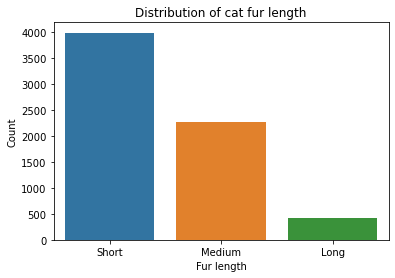

In [194]:
ax = sns.barplot(x = 'FurLength', y = 'PetID', data=catData.groupby(['FurLength']).count().reset_index())
plt.xticks(np.arange(0,3), ['Short', 'Medium', 'Long'])
plt.ylabel('Count')
plt.title('Distribution of cat fur length')
plt.xlabel('Fur length')
plt.show()

Group 'Long' together with 'Medium.'

In [195]:
catData['FurLength'] = np.where(catData.FurLength == 3, 2, catData.FurLength)

In [196]:
catData.FurLength.value_counts()

1    3993
2    2692
Name: FurLength, dtype: int64

In [197]:
enc = preprocessing.OneHotEncoder()
furEnc = enc.fit_transform(catData.FurLength.values.reshape(-1, 1)).toarray()
furOneHot = pd.DataFrame(furEnc, columns = ["FurLength_"+str(i) for i in sorted(catData.FurLength.unique()) ])
catData = pd.concat([catData, furOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'FurLength' column
catData.drop(['FurLength'], axis=1, inplace = True) 
catData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6296e909a,1,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
d24c30b4b,3,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1caa6fcdb,12,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
c06d167ca,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [198]:
catData.Vaccinated.value_counts()

2    4186
1    1855
3     644
Name: Vaccinated, dtype: int64

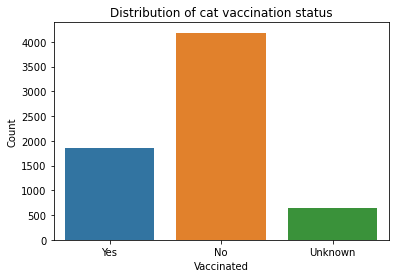

In [199]:
ax = sns.barplot(x = 'Vaccinated', y = 'PetID', data=catData.groupby(['Vaccinated']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of cat vaccination status')
plt.xlabel('Vaccinated')
plt.show()

In [200]:
catData.Vaccinated = np.where((catData['Vaccinated'] == 1), 1, 0) 

In [201]:
catData.Vaccinated.value_counts()

0    4830
1    1855
Name: Vaccinated, dtype: int64

In [202]:
enc = preprocessing.OneHotEncoder()
vaccinatedEnc = enc.fit_transform(catData.Vaccinated.values.reshape(-1, 1)).toarray()
vaccinatedOneHot = pd.DataFrame(vaccinatedEnc, columns = ["Vaccinated_"+str(i) for i in sorted(catData.Vaccinated.unique()) ])
catData = pd.concat([catData, vaccinatedOneHot.set_index(catData['PetID'])], axis=1)

In [203]:
catData.Dewormed.value_counts()

1    3374
2    2715
3     596
Name: Dewormed, dtype: int64

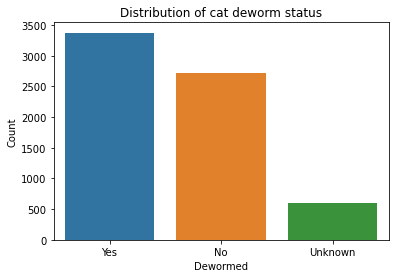

In [204]:
ax = sns.barplot(x = 'Dewormed', y = 'PetID', data=catData.groupby(['Dewormed']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of cat deworm status')
plt.xlabel('Dewormed')
plt.show()

In [205]:
catData.Dewormed = np.where((catData['Dewormed'] == 1), 1, 0) 

In [206]:
catData.Dewormed.value_counts()

1    3374
0    3311
Name: Dewormed, dtype: int64

In [207]:
enc = preprocessing.OneHotEncoder()
dewormedEnc = enc.fit_transform(catData.Dewormed.values.reshape(-1, 1)).toarray()
dewormedOneHot = pd.DataFrame(dewormedEnc, columns = ["Dewormed_"+str(i) for i in sorted(catData.Dewormed.unique()) ])
catData = pd.concat([catData, dewormedOneHot.set_index(catData['PetID'])], axis=1)

In [208]:
catData.Sterilized.value_counts()

2    4878
1    1124
3     683
Name: Sterilized, dtype: int64

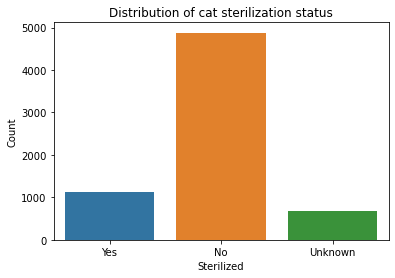

In [209]:
ax = sns.barplot(x = 'Sterilized', y = 'PetID', data=catData.groupby(['Sterilized']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of cat sterilization status')
plt.xlabel('Sterilized')
plt.show()

In [210]:
catData.Sterilized = np.where((catData['Sterilized'] == 1), 1, 0) 

In [211]:
catData.Sterilized.value_counts()

0    5561
1    1124
Name: Sterilized, dtype: int64

In [212]:
enc = preprocessing.OneHotEncoder()
sterilizedEnc = enc.fit_transform(catData.Sterilized.values.reshape(-1, 1)).toarray()
sterilizedOneHot = pd.DataFrame(sterilizedEnc, columns = ["Sterilized_"+str(i) for i in sorted(catData.Sterilized.unique()) ])
catData = pd.concat([catData, sterilizedOneHot.set_index(catData['PetID'])], axis=1)

In [213]:
catData['Preparation'] = np.where((catData['Vaccinated'] == 1) & (catData['Dewormed'] == 1) & (catData['Sterilized'] == 1), 1, 0) 

In [214]:
catData.Preparation.value_counts()

0    5871
1     814
Name: Preparation, dtype: int64

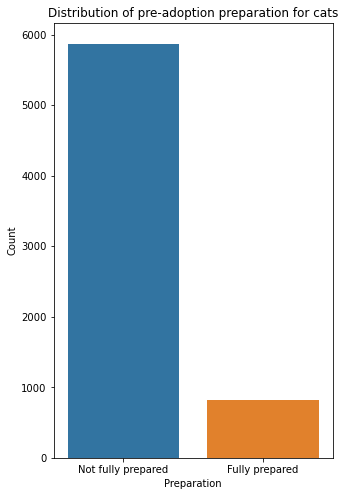

In [215]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Preparation', y = 'PetID', data=catData.groupby(['Preparation']).count().reset_index())
plt.xticks(np.arange(0,2), ['Not fully prepared', 'Fully prepared'])
plt.ylabel('Count')
plt.title('Distribution of pre-adoption preparation for cats')
plt.xlabel('Preparation')
plt.show()

In [216]:
enc = preprocessing.OneHotEncoder()
prepEnc = enc.fit_transform(catData.Preparation.values.reshape(-1, 1)).toarray()
prepOneHot = pd.DataFrame(prepEnc, columns = ["Preparation_"+str(i) for i in sorted(catData.Preparation.unique()) ])
catData = pd.concat([catData, prepOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'Preparation' column
catData.drop('Preparation', axis=1, inplace = True) 
catData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,0,0,0,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6296e909a,1,0,0,0,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
d24c30b4b,3,0,0,0,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1caa6fcdb,12,0,0,0,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
c06d167ca,2,0,0,0,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [217]:
catData.Health.value_counts()

1    6465
2     209
3      11
Name: Health, dtype: int64

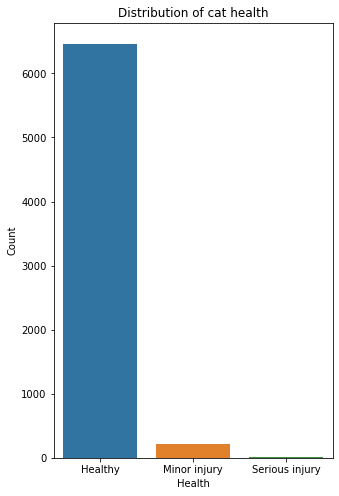

In [218]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Health', y = 'PetID', data=catData.groupby(['Health']).count().reset_index())
plt.xticks(np.arange(0,3), ['Healthy', 'Minor injury', 'Serious injury'])
plt.ylabel('Count')
plt.title('Distribution of cat health')
plt.xlabel('Health')
plt.show()

Group 'Serious injury' together with 'Minor injury.'

In [219]:
catData['Health'] = np.where(catData.Health == 1, 1, 0)

In [220]:
catData.Health.value_counts()

1    6465
0     220
Name: Health, dtype: int64

In [221]:
enc = preprocessing.OneHotEncoder()
healthEnc = enc.fit_transform(catData.Health.values.reshape(-1, 1)).toarray()
healthOneHot = pd.DataFrame(healthEnc, columns = ["Health_"+str(i) for i in sorted(catData.Health.unique()) ])
catData = pd.concat([catData, healthOneHot.set_index(catData['PetID'])], axis=1)
catData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,0,0,0,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6296e909a,1,0,0,0,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
d24c30b4b,3,0,0,0,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1caa6fcdb,12,0,0,0,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
c06d167ca,2,0,0,0,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Create a new feature 'Cost' which uncovers foreseeable cost based on vaccination, deworming, sterilization and health statuses for each cat. This value ranges from 0 to 4 with 0 representing no foreseeable costs and 4 representing 4 sources of foreseeable cost.

In [222]:
catData['Cost'] = 4 - (catData.Vaccinated + catData.Dewormed + catData.Sterilized + catData.Health)
catData.head()

,Age,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,0,0,0,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
6296e909a,1,0,0,0,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
d24c30b4b,3,0,0,0,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
1caa6fcdb,12,0,0,0,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
c06d167ca,2,0,0,0,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3


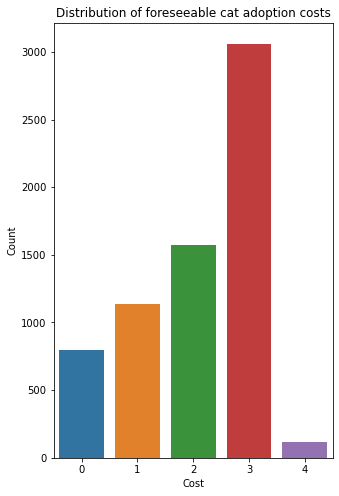

In [223]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Cost', y = 'PetID', data=catData.groupby(['Cost']).count().reset_index())
plt.ylabel('Count')
plt.title('Distribution of foreseeable cat adoption costs')
plt.xlabel('Cost')
plt.show()

In [224]:
catData.drop(['Vaccinated', 'Dewormed', 'Sterilized', 'Health'], axis=1, inplace = True) 
catData.head()

,Age,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
6296e909a,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
d24c30b4b,3,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
1caa6fcdb,12,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3
c06d167ca,2,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3


In [225]:
catData.Quantity.value_counts() 

1     4806
2      787
3      460
4      320
5      183
6       67
7       27
10      10
8        7
20       3
15       3
9        3
11       3
12       2
14       1
16       1
18       1
13       1
Name: Quantity, dtype: int64

In [226]:
catData.Quantity.describe()

count    6685.000000
mean        1.638295
std         1.380780
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        20.000000
Name: Quantity, dtype: float64

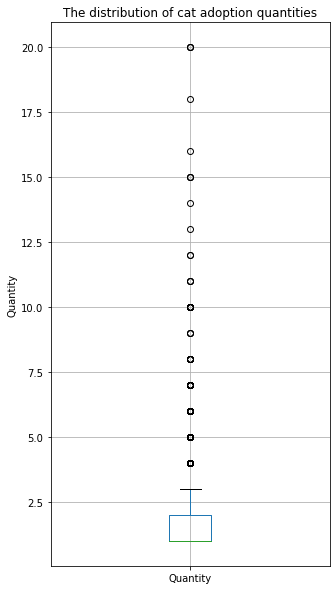

In [227]:
plt.figure(figsize = (5, 10))
catData[['Quantity']].boxplot()
plt.ylabel('Quantity')
plt.title('The distribution of cat adoption quantities')
plt.show()

In [228]:
catData.Fee.describe()

count    6685.000000
mean       17.567988
std        61.468071
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Fee, dtype: float64

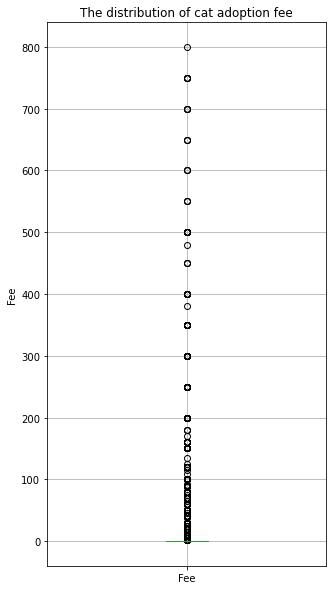

In [229]:
plt.figure(figsize = (5, 10))
catData[['Fee']].boxplot()
plt.ylabel('Fee')
plt.title('The distribution of cat adoption fee')
plt.show()

In [230]:
z_scores = stats.zscore(catData.Fee)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
catData = catData[filtered_entries]

109 records were dropped.

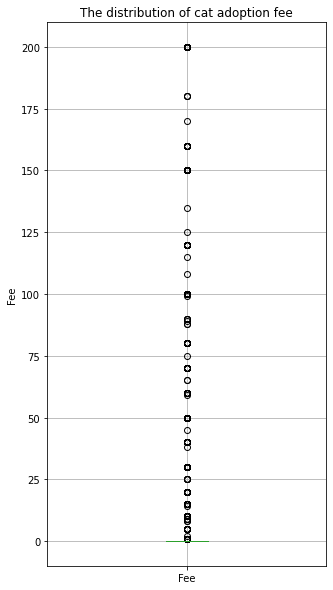

In [231]:
plt.figure(figsize = (5, 10))
catData[['Fee']].boxplot()
plt.ylabel('Fee')
plt.title('The distribution of cat adoption fee')
plt.show()

In [232]:
# catData.Population.value_counts()

In [233]:
catData.State.value_counts(normalize = True)

41326    0.555657
41401    0.315541
41336    0.033607
41327    0.032999
41332    0.016880
41330    0.013230
41325    0.008060
41335    0.007755
41324    0.007147
41361    0.003193
41345    0.002433
41367    0.001825
41342    0.001521
41415    0.000152
Name: State, dtype: float64

In [234]:
#Get density per state
density = pd.DataFrame(catData.State.value_counts(normalize=True)).reset_index()
density.columns = ['state', 'Density']
density

,state,Density
0,41326,0.555657
1,41401,0.315541
2,41336,0.033607
3,41327,0.032999
4,41332,0.016880
5,41330,0.013230
6,41325,0.008060
7,41335,0.007755
8,41324,0.007147
9,41361,0.003193


In [235]:
catData = catData.join(density.set_index('state'), on='State')

In [236]:
stateCounts = catData.State.value_counts().to_frame()

Let's only keep the top 7 states and group the rest of the states as others: 0.

In [237]:
top7States = list(stateCounts.index[:7])
catData.State = np.where((catData['State'].isin(top7States)), catData['State'], 0) 

In [238]:
catData.State.value_counts()

41326    3654
41401    2075
41336     221
41327     217
0         158
41332     111
41330      87
41325      53
Name: State, dtype: int64

In [239]:
enc = preprocessing.OneHotEncoder()
stateEnc = enc.fit_transform(catData.State.values.reshape(-1, 1)).toarray()
stateOneHot = pd.DataFrame(stateEnc, columns = ["State_"+str(i) for i in sorted(catData.State.unique()) ])
catData = pd.concat([catData, stateOneHot.set_index(catData['PetID'])], axis=1)
# drop 'State' column
# catData.drop(['State', 'StateName'], axis=1, inplace = True) 
catData.drop(['State'], axis=1, inplace = True) 
catData.head()

,Age,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41325,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,100,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6296e909a,1,1,0,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.315541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
d24c30b4b,3,1,0,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
c06d167ca,2,1,0,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7a0942d61,12,1,0,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [240]:
pd.set_option('display.max_rows', None)
rescuerCounts = catData.RescuerID.value_counts().to_frame()
rescuerCounts.columns = ['RescuerFreq']
rescuerCounts

,RescuerFreq
c00756f2bdd8fa88fc9f07a8309f7d5d,74
438a9bdce8ef4d5948fc40e422d34d0d,74
e62135526c27156b8479420aad166317,57
b770bac0ca797cf1433c48a35d30c4cb,50
167119eeb94dec6c615c602952c527c8,40
5aca30a29e8290093fee2a334d65d835,35
90569c3f7cb0af35cba5dac82c0ac9d7,34
09771cded8c18d94a16a6548377410a8,33
95eab75701bfbddafb9e1e01e1ee9214,33
c6fa60201b7ca135608d592d7ac19ec4,30


In [241]:
catData = catData.join(rescuerCounts, on = 'RescuerID')
catData.head()

,Age,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41325,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,100,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8
6296e909a,1,1,0,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.315541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
d24c30b4b,3,1,0,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
c06d167ca,2,1,0,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
7a0942d61,12,1,0,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [242]:
# catData['FrequentRescuer'] = np.where(catData.RescuerFreq >= 2, 1, 0)
# catData.FrequentRescuer.value_counts()

In [243]:
# plt.figure(figsize = (5,8))
# ax = sns.barplot(x = 'FrequentRescuer', y = 'PetID', data=catData.groupby(['FrequentRescuer']).count().reset_index())
# plt.xticks(np.arange(0,2), ['Non-frequent', 'Frequent'])
# plt.ylabel('Count')
# plt.title('Distribution of non-frequent vs. frequent cat rescuers')
# plt.xlabel('Rescuer')
# plt.show()

In [244]:
# enc = preprocessing.OneHotEncoder()
# rescuerEnc = enc.fit_transform(catData.FrequentRescuer.values.reshape(-1, 1)).toarray()
# rescuerOneHot = pd.DataFrame(rescuerEnc, columns = ["FrequentRescuer_"+str(i) for i in sorted(catData.FrequentRescuer.unique())])
# catData = pd.concat([catData, rescuerOneHot.set_index(catData['PetID'])], axis=1)
# # dropping 'FrequentRescuer' column
# catData.drop('FrequentRescuer', axis=1, inplace = True) 
# catData.head()

In [245]:
top10Rescuers = list(rescuerCounts.index[:10])
catData.RescuerID = np.where((catData['RescuerID'].isin(top10Rescuers)), catData['RescuerID'], '999') 

In [246]:
catData.RescuerID.value_counts()

999                                 6116
438a9bdce8ef4d5948fc40e422d34d0d      74
c00756f2bdd8fa88fc9f07a8309f7d5d      74
e62135526c27156b8479420aad166317      57
b770bac0ca797cf1433c48a35d30c4cb      50
167119eeb94dec6c615c602952c527c8      40
5aca30a29e8290093fee2a334d65d835      35
90569c3f7cb0af35cba5dac82c0ac9d7      34
95eab75701bfbddafb9e1e01e1ee9214      33
09771cded8c18d94a16a6548377410a8      33
c6fa60201b7ca135608d592d7ac19ec4      30
Name: RescuerID, dtype: int64

In [247]:
enc = preprocessing.OneHotEncoder()
rescuerEnc = enc.fit_transform(catData.RescuerID.values.reshape(-1, 1)).toarray()
rescuerOneHot = pd.DataFrame(rescuerEnc, columns = ["Rescuer_"+str(i) for i in sorted(catData.RescuerID.unique())])
catData = pd.concat([catData, rescuerOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'RescuerID' column
catData.drop('RescuerID', axis=1, inplace = True) 
catData.head()

,Age,Quantity,Fee,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41325,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq,Rescuer_09771cded8c18d94a16a6548377410a8,Rescuer_167119eeb94dec6c615c602952c527c8,Rescuer_438a9bdce8ef4d5948fc40e422d34d0d,Rescuer_5aca30a29e8290093fee2a334d65d835,Rescuer_90569c3f7cb0af35cba5dac82c0ac9d7,Rescuer_95eab75701bfbddafb9e1e01e1ee9214,Rescuer_999,Rescuer_b770bac0ca797cf1433c48a35d30c4cb,Rescuer_c00756f2bdd8fa88fc9f07a8309f7d5d,Rescuer_c6fa60201b7ca135608d592d7ac19ec4,Rescuer_e62135526c27156b8479420aad166317
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,100,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6296e909a,1,1,0,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.315541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
d24c30b4b,3,1,0,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
c06d167ca,2,1,0,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7a0942d61,12,1,0,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [248]:
catData.VideoAmt.value_counts() 

0    6321
1     189
2      46
3       9
4       5
6       3
5       3
Name: VideoAmt, dtype: int64

In [249]:
catData.VideoAmt.describe()

count    6576.000000
mean        0.054897
std         0.325631
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: VideoAmt, dtype: float64

In [250]:
catData.PhotoAmt.value_counts(dropna = False) 

3.0     1168
1.0     1143
5.0     1059
2.0     1001
4.0      898
6.0      288
7.0      212
0.0      141
8.0      133
9.0      108
10.0      81
11.0      80
12.0      57
13.0      39
14.0      30
15.0      29
16.0      19
17.0      17
19.0      11
20.0      10
18.0       8
30.0       8
23.0       6
26.0       5
25.0       5
24.0       4
22.0       4
21.0       4
27.0       4
28.0       2
29.0       2
Name: PhotoAmt, dtype: int64

In [251]:
catData.PhotoAmt.describe()

count    6576.000000
mean        4.073753
std         3.482913
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: PhotoAmt, dtype: float64

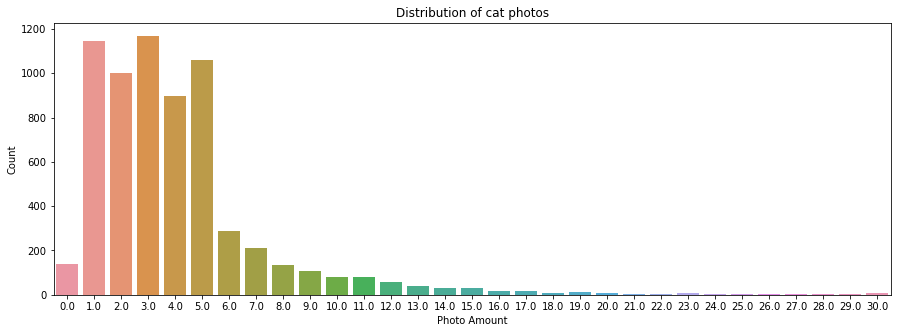

In [252]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'PhotoAmt', y = 'PetID', data=catData.groupby(['PhotoAmt']).count().reset_index())
plt.ylabel('Count')
plt.title('Distribution of cat photos')
plt.xlabel('Photo Amount')
plt.show()

In [253]:
catData['Media'] = np.where((catData['VideoAmt'] >= 1) | (catData['PhotoAmt'] >= 1), 1, 0) 

In [254]:
catData.Media.value_counts()

1    6436
0     140
Name: Media, dtype: int64

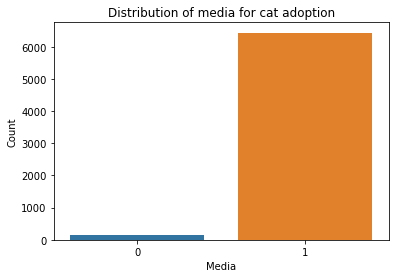

In [255]:
ax = sns.barplot(x = 'Media', y = 'PetID', data=catData.groupby(['Media']).count().reset_index())
plt.ylabel('Count')
plt.title('Distribution of media for cat adoption')
plt.xlabel('Media')
plt.show()

In [256]:
enc = preprocessing.OneHotEncoder()
mediaEnc = enc.fit_transform(catData.Media.values.reshape(-1, 1)).toarray()
mediaOneHot = pd.DataFrame(mediaEnc, columns = ["Media_"+str(i) for i in sorted(catData.Media.unique()) ])
catData = pd.concat([catData, mediaOneHot.set_index(catData['PetID'])], axis=1)
# dropping 'Media' column
catData.drop(['Media'], axis=1, inplace = True) 
catData.head()

,Age,Quantity,Fee,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41325,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq,Rescuer_09771cded8c18d94a16a6548377410a8,Rescuer_167119eeb94dec6c615c602952c527c8,Rescuer_438a9bdce8ef4d5948fc40e422d34d0d,Rescuer_5aca30a29e8290093fee2a334d65d835,Rescuer_90569c3f7cb0af35cba5dac82c0ac9d7,Rescuer_95eab75701bfbddafb9e1e01e1ee9214,Rescuer_999,Rescuer_b770bac0ca797cf1433c48a35d30c4cb,Rescuer_c00756f2bdd8fa88fc9f07a8309f7d5d,Rescuer_c6fa60201b7ca135608d592d7ac19ec4,Rescuer_e62135526c27156b8479420aad166317,Media_0,Media_1
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,100,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6296e909a,1,1,0,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.315541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
d24c30b4b,3,1,0,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
c06d167ca,2,1,0,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7a0942d61,12,1,0,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [257]:
catData['DescLen'] = catData['Description'].str.len()

In [258]:
catData.DescLen.describe()

count    6568.000000
mean      348.186358
std       376.965813
min         1.000000
25%       118.000000
50%       247.000000
75%       450.000000
max      5798.000000
Name: DescLen, dtype: float64

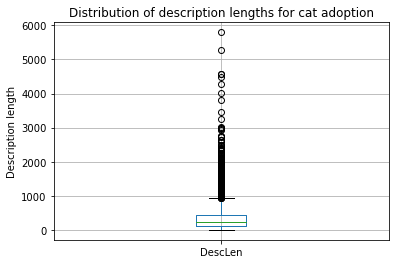

In [259]:
catData[['DescLen']].boxplot()
plt.ylabel('Description length')
plt.title('Distribution of description lengths for cat adoption')
plt.show()

In [260]:
# Set observations with 'DescLen' na to 0
catData['DescLen'] = np.where(catData['DescLen'].isna(), 0, catData['DescLen']) 

In [261]:
catData['DescNumWords'] = catData.Description.str.split().str.len()
catData.head()

,Age,Quantity,Fee,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41325,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq,Rescuer_09771cded8c18d94a16a6548377410a8,Rescuer_167119eeb94dec6c615c602952c527c8,Rescuer_438a9bdce8ef4d5948fc40e422d34d0d,Rescuer_5aca30a29e8290093fee2a334d65d835,Rescuer_90569c3f7cb0af35cba5dac82c0ac9d7,Rescuer_95eab75701bfbddafb9e1e01e1ee9214,Rescuer_999,Rescuer_b770bac0ca797cf1433c48a35d30c4cb,Rescuer_c00756f2bdd8fa88fc9f07a8309f7d5d,Rescuer_c6fa60201b7ca135608d592d7ac19ec4,Rescuer_e62135526c27156b8479420aad166317,Media_0,Media_1,DescLen,DescNumWords
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,100,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,359.0,69.0
6296e909a,1,1,0,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.315541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,118.0,23.0
d24c30b4b,3,1,0,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,87.0,18.0
c06d167ca,2,1,0,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,79.0,13.0
7a0942d61,12,1,0,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,232.0,45.0


In [262]:
# Set observations with 'DescNumWords' na to 0
catData['DescNumWords'] = np.where(catData['DescNumWords'].isna(), 0, catData['DescNumWords']) 

In [263]:
catData.DescNumWords.describe()

count    6576.000000
mean       64.480231
std        69.820737
min         0.000000
25%        21.000000
50%        46.000000
75%        84.000000
max      1153.000000
Name: DescNumWords, dtype: float64

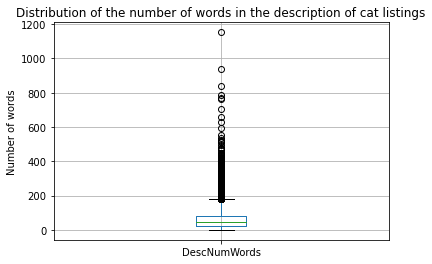

In [264]:
catData[['DescNumWords']].boxplot()
plt.ylabel('Number of words')
plt.title('Distribution of the number of words in the description of cat listings')
plt.show()

In [265]:
tfidf = TfidfVectorizer(stop_words='english', strip_accents = "ascii", max_features = 100)
features = tfidf.fit_transform(catData['Description'].values.astype('U'))
tfidf.get_feature_names()

['able',
 'active',
 'adopt',
 'adopted',
 'adopter',
 'adopters',
 'adoption',
 'adorable',
 'age',
 'area',
 'attention',
 'away',
 'beautiful',
 'birth',
 'black',
 'box',
 'boy',
 'care',
 'cat',
 'cats',
 'contact',
 'currently',
 'cute',
 'dan',
 'dewormed',
 'dia',
 'eat',
 'email',
 'eyes',
 'family',
 'fee',
 'female',
 'food',
 'forever',
 'free',
 'friendly',
 'fur',
 'good',
 'hair',
 'healthy',
 'help',
 'home',
 'hope',
 'house',
 'indoor',
 'interested',
 'just',
 'kitten',
 'kittens',
 'kitty',
 'know',
 'kucing',
 'let',
 'like',
 'likes',
 'litter',
 'little',
 'long',
 'looking',
 'love',
 'lovely',
 'loves',
 'loving',
 'male',
 'manja',
 'month',
 'months',
 'mother',
 'need',
 'needs',
 'neutered',
 'new',
 'old',
 'owner',
 'people',
 'pet',
 'play',
 'playful',
 'really',
 'rescued',
 'rm',
 'saya',
 'siblings',
 'sms',
 'spayed',
 'stray',
 'sweet',
 'tail',
 'thank',
 'time',
 'toilet',
 'trained',
 'vaccinated',
 'vaccination',
 'vet',
 'want',
 'weeks',
 'wh

In [266]:
keywordsDf = pd.DataFrame(features.todense(), columns = tfidf.get_feature_names())
keywordsDf.head()

,able,active,adopt,adopted,adopter,adopters,adoption,adorable,age,area,attention,away,beautiful,birth,black,box,boy,care,cat,cats,contact,currently,cute,dan,dewormed,dia,eat,email,eyes,family,fee,female,food,forever,free,friendly,fur,good,hair,healthy,help,home,hope,house,indoor,interested,just,kitten,kittens,kitty,know,kucing,let,like,likes,litter,little,long,looking,love,lovely,loves,loving,male,manja,month,months,mother,need,needs,neutered,new,old,owner,people,pet,play,playful,really,rescued,rm,saya,siblings,sms,spayed,stray,sweet,tail,thank,time,toilet,trained,vaccinated,vaccination,vet,want,weeks,whatsapp,white,yang
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.431196,0.000000,0.385831,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.287709,0.0,0.0,0.0,0.000000,0.0,0.0,0.240691,0.000000,0.211301,0.0,0.0,0.0,0.0,0.0,0.000000,0.274592,0.227847,0.0,0.0,0.0,0.300715,0.0,0.206024,0.0,0.270316,0.0,0.0,0.182609,0.00000,0.232586,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.243195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597702,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.422947,0.0,0.000000,0.0,0.000000,0.681079,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.594218,0.0,0.000000,0.000000,0.437605,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.674839,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.613327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606009,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.506540,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.209824,0.000000,0.308359,0.0,0.311772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.211703,0.0,0.000000,0.0,0.286544,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.318191,0.0,0.0,0.000000,0.364777,0.000000,0.0,0.0,0.0,0.0,0.0,0.355577,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.37712,0.000000,0.0,0.0,0.0,0.0,0.0,0.365785,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [267]:
# Extract top 20 relevant keywords & their equivalents
catKeywords = ['active', 'adorable', 'beautiful', 'birth', 'box', 'cute', 'eyes', 'family', 'friendly', 'fur', 
               'good', 'healthy', 'indoor', 'little', 'lovely', 'mother', 'playful', 'siblings', 'sweet', 'trained']
keywordsDf = keywordsDf[catKeywords]

In [268]:
catData = catData.join(keywordsDf.set_index(catData['PetID']))
for kw in catKeywords:
    catData[kw] = np.where(catData['Description'].str.contains(kw, na = False), 1, 0)
catData.drop(columns = 'Description', inplace = True)
catData.head()

,Age,Quantity,Fee,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,NameNumWords,ThreeMonths_0,ThreeMonths_1,DomesticBreed_0,DomesticBreed_1,PureBreed_0,PureBreed_1,Breed_243,Breed_247,Breed_254,Breed_264,Breed_265,Breed_266,Breed_283,Breed_285,Breed_292,Breed_299,Breed_999,Gender_1,Gender_2,Gender_3,NumColor_1,NumColor_2,NumColor_3,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,Color_7,Size_1,Size_2,Size_3,FurLength_1,FurLength_2,Vaccinated_0,Vaccinated_1,Dewormed_0,Dewormed_1,Sterilized_0,Sterilized_1,Preparation_0,Preparation_1,Health_0,Health_1,Cost,Density,State_0,State_41325,State_41326,State_41327,State_41330,State_41332,State_41336,State_41401,RescuerFreq,Rescuer_09771cded8c18d94a16a6548377410a8,Rescuer_167119eeb94dec6c615c602952c527c8,Rescuer_438a9bdce8ef4d5948fc40e422d34d0d,Rescuer_5aca30a29e8290093fee2a334d65d835,Rescuer_90569c3f7cb0af35cba5dac82c0ac9d7,Rescuer_95eab75701bfbddafb9e1e01e1ee9214,Rescuer_999,Rescuer_b770bac0ca797cf1433c48a35d30c4cb,Rescuer_c00756f2bdd8fa88fc9f07a8309f7d5d,Rescuer_c6fa60201b7ca135608d592d7ac19ec4,Rescuer_e62135526c27156b8479420aad166317,Media_0,Media_1,DescLen,DescNumWords,active,adorable,beautiful,birth,box,cute,eyes,family,friendly,fur,good,healthy,indoor,little,lovely,mother,playful,siblings,sweet,trained
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,3,1,100,0,86e1089a3,1.0,2,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,359.0,69.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6296e909a,1,1,0,0,6296e909a,2.0,0,0.0,1.0,11.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.315541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,118.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
d24c30b4b,3,1,0,0,d24c30b4b,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,87.0,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c06d167ca,2,1,0,0,c06d167ca,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,79.0,13.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7a0942d61,12,1,0,0,7a0942d61,2.0,4,0.0,1.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,0.555657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,232.0,45.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Output cleaned cat dataframe into CSV. 

In [269]:
catData.drop(columns = 'PetID').convert_dtypes().to_csv(r'catData.csv', index = True, header=True)